# Goethe University
# Data Science and Marketing Analysis, Yelp Dataset <a name='t'></a>

# A - Preparation

### Read Libraries <a name='p1s1'></a>

In [2]:
import pandas as pd
import json
from datetime import datetime
import seaborn as sns
from collections import Counter
import random
import matplotlib.pyplot as plt
import geopy
import numpy as np
import re
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import gmaps

## 1 Check-in <a name='p1h1'></a>

- The Reason starting with Check-in is to filter our dataset to only 1 year

### 1.1- Read & Normalize File <a name='p1h1s1'></a>

In [3]:
# To read & Normalize File because it was in Json format
check = pd.read_csv('check_az_open.csv') #Original File
check = pd.json_normalize(check.j.apply(json.loads))
check

,date,business_id
0,"2010-03-23 05:49:25, 2010-08-27 05:38:45, 2010...",-01XupAWZEXbdNbxNg5mEg
1,"2010-07-28 21:07:28, 2010-07-31 21:16:54, 2010...",-092wE7j5HZOogMLAh40zA
2,"2010-09-04 16:52:19, 2010-09-11 16:26:25, 2010...",4RSJzjaxYJ9CRTfrk1sHZg
3,"2010-03-15 06:48:51, 2010-10-15 20:56:00, 2011...",4RV97YE8VEw05tu0WO425g
4,"2010-12-05 23:20:18, 2011-01-19 19:16:49, 2011...",-0Sgh0QlUKVsWosCWJzGqQ
...,...,...
7603,"2010-09-24 22:43:39, 2010-09-26 00:30:52, 2010...",zwmps5SXn30g-f5wqg_r9A
7604,"2012-09-24 19:27:35, 2012-12-10 17:20:54, 2012...",zy6Hzao6lTmuJMZo4BemIg
7605,"2016-12-22 02:40:01, 2016-12-22 03:48:05, 2016...",zyPGYeXF4XKCqNN1pjFWhg
7606,"2011-02-05 20:11:04, 2011-05-02 16:31:11, 2011...",zzsOLFhgUw8gnjLTVVItFA


### 1.2- Create Every Unique Day As A List <a name='p1h1s2'></a>

In [ ]:
# To analyze Check-in Numbers Daily, we should get check-in numbers in tabular format for each businesses.

#(~10 Minutes to Run)
datelist = []
for i in range(len(check)):
    list_string2 = pd.Series(check['date'][i]).str.cat(sep=',')
    list_split2 = list_string2.split(',') #211050
    list_split_all2 = [x.strip(' ') for x in list_split2] #NoChange
    datetime_list = []
    for i in range(len(list_split_all2)):
        datetime_list.append(datetime.strptime(list_split_all2[i], '%Y-%m-%d %H:%M:%S'))
    date_list= []
    for i in range(len(datetime_list)):
        date_list.append(datetime.date(datetime_list[i]))
    datelist.append(date_list)

unique_datelist1 = []
for i in datelist:
    unique_datelist1.append(list(set(i)))

unique_datelist2 = []
for i in range(len(unique_datelist1)): #7230
    for k in range(len(unique_datelist1[i])):
        unique_datelist2.append(unique_datelist1[i][k])
#
unique_datelist2 = list(set(unique_datelist2))
unique_datelist2.sort()
for i in range(len(unique_datelist2)):
    check[str(unique_datelist2[i])] = ""

"""
Date count for each business to columns
"""
for i in range(len(datelist)):
    for date in datelist[i]:
            trh = date.strftime("%Y-%m-%d")
            count = datelist[i].count(date)
            check.loc[i,trh] = int(count)

for i in range(len(datelist)):
    for date in datelist[i]:
            trh = date.strftime("%Y-%m-%d")
            count = datelist[i].count(date)
            check.loc[i,trh] = int(count)

check.drop(columns='date',inplace=True)
#Save This File as check_1_by_dates.csv
#check.to_csv('check_1_by_dates.csv',index=False)

check.head()

### 1.3- Transpose for Daily #s by Business <a name='p1h1s3'></a>

In [5]:
#Transposing to Have Business ID's in Columns and Dates in Rows
#Later we will transpose again to get Weekly&Monthly Numbers

# Create check_t
check= pd.read_csv('check_1_by_dates.csv')
check.drop(columns='Unnamed: 0',inplace=True)
check_t = check.T
check_t.reset_index(inplace=True)
check_t.columns = check_t.loc[0,:] #Change column names
check_t.drop(0,inplace=True) # Drop first row
check_t.reset_index(drop=True,inplace=True)
check_t.rename(columns={'business_id':'Date'},inplace=True)
check_t = check_t[:-1] #Drop Sum Row, Last
check_t.sort_values('Date',inplace=True)
check_t['Date'] =  pd.to_datetime(check_t['Date'])

# Filter only for 2015
start_date = pd.to_datetime('01/01/2015')
end_date = pd.to_datetime('01/01/2016')
check_t_2015 = check_t.loc[(check_t['Date'] >= start_date) & (check_t['Date'] < end_date)].sort_values('Date')
check_t_2015.head()

,Date,-01XupAWZEXbdNbxNg5mEg,-092wE7j5HZOogMLAh40zA,4RSJzjaxYJ9CRTfrk1sHZg,4RV97YE8VEw05tu0WO425g,-0Sgh0QlUKVsWosCWJzGqQ,-0WegMt6Cy966qlDKhu6jA,-0tgMGl7D9B10YjSN2ujLA,-1UMR00eXtwaeh59pEiDjA,-1VaIJza42Hjev6ukacCNg,...,ztk25JYxDZ9_9e2v6uHJAA,zusXbyXnJfS1Q-pZE9elmQ,zvB0Vzhomsodw_iQ7FHY1Q,zvsJSNdg9UXEIL6FKiGa3Q,zwNLJ2VglfEvGu7DDZjJ4g,zwmps5SXn30g-f5wqg_r9A,zy6Hzao6lTmuJMZo4BemIg,zyPGYeXF4XKCqNN1pjFWhg,zzsOLFhgUw8gnjLTVVItFA,zzwicjPC9g246MK2M1ZFBA
1811,2015-01-01,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1812,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1813,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,2015-01-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


### 1.4- Weekly Check-ins <a name='p1h1s4'></a>

In [6]:
# To Create Weekly and Monthly Checkin Numbers as Sum

#Create Weekly Checkin Numbers as Sum
ch_t_2015_weekly= check_t_2015.groupby(pd.Grouper(key='Date',freq='W'),as_index=False).sum()
ch_2015_Weekly =ch_t_2015_weekly.T
ch_2015_Weekly = pd.DataFrame(ch_2015_Weekly)
ch_2015_Weekly.columns += 1 # Add 1 to each week number, (to fix)
ch_2015_Weekly.reset_index(inplace=True)
ch_2015_Weekly['sum'] = np.sum(ch_2015_Weekly.iloc[:,1:],axis=1)
ch_2015_Weekly.rename(columns={0:'business_id'},inplace=True)

#Save This file as check_2_2015_Weekly.csv
#ch_2015_Weekly.to_csv('check_2_2015_Weekly.csv')
ch_2015_Weekly

,business_id,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,sum
0,-01XupAWZEXbdNbxNg5mEg,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,29.0
1,-092wE7j5HZOogMLAh40zA,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
2,4RSJzjaxYJ9CRTfrk1sHZg,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
3,4RV97YE8VEw05tu0WO425g,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
4,-0Sgh0QlUKVsWosCWJzGqQ,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,zwmps5SXn30g-f5wqg_r9A,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,52.0
7604,zy6Hzao6lTmuJMZo4BemIg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7605,zyPGYeXF4XKCqNN1pjFWhg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7606,zzsOLFhgUw8gnjLTVVItFA,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,2.0,30.0


### 1.5 Monthly Check-ins <a name='p1h1s5'></a>

In [7]:
# Create Monthly Checkin Numbers as Sum
ch_2015_monthly_1 = check_t_2015.groupby(pd.Grouper(key='Date',freq='M'),as_index=False).sum()
ch_2015_Monthly = ch_2015_monthly_1.T
ch_2015_Monthly.columns += 1 # Add 1 to each month number, (to fix)
ch_2015_Monthly['sum'] = np.sum(ch_2015_Monthly,axis=1)
ch_2015_Monthly.reset_index(inplace=True)
ch_2015_Monthly.rename(columns={0:'business_id'},inplace=True)

#Save This file as check_3_2015_Monthly.csv
#ch_2015_Monthly.to_csv('check_3_2015_Monthly.csv')

ch_2015_Monthly

,business_id,1,2,3,4,5,6,7,8,9,10,11,12,sum
0,-01XupAWZEXbdNbxNg5mEg,3.0,1.0,3.0,2.0,6.0,3.0,1.0,2.0,3.0,3.0,0.0,2.0,29.0
1,-092wE7j5HZOogMLAh40zA,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,6.0
2,4RSJzjaxYJ9CRTfrk1sHZg,6.0,2.0,7.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,0.0,35.0
3,4RV97YE8VEw05tu0WO425g,3.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0,1.0,6.0,2.0,0.0,34.0
4,-0Sgh0QlUKVsWosCWJzGqQ,0.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,zwmps5SXn30g-f5wqg_r9A,5.0,5.0,9.0,3.0,5.0,3.0,5.0,4.0,2.0,4.0,4.0,3.0,52.0
7604,zy6Hzao6lTmuJMZo4BemIg,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
7605,zyPGYeXF4XKCqNN1pjFWhg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7606,zzsOLFhgUw8gnjLTVVItFA,3.0,2.0,1.0,2.0,0.0,5.0,5.0,2.0,0.0,2.0,1.0,7.0,30.0


### 1.6- Filtering Businesses At Least 1 Monthly Check-in <a name='p1h1s6'></a>

In [8]:
# To Filter out Business that does not have at least #1 Check-in in each month in 2015, also create b_id_NZ_df
ch_2015_Monthly_NZ = ch_2015_Monthly.loc[(ch_2015_Monthly[1] != 0) 
& (ch_2015_Monthly[2] != 0)
& (ch_2015_Monthly[3] != 0)
& (ch_2015_Monthly[4] != 0)
& (ch_2015_Monthly[5] != 0)
& (ch_2015_Monthly[6] != 0)
& (ch_2015_Monthly[7] != 0)
& (ch_2015_Monthly[8] != 0)
& (ch_2015_Monthly[9] != 0)
& (ch_2015_Monthly[10] != 0)
& (ch_2015_Monthly[11] != 0)
& (ch_2015_Monthly[12] != 0)
]
ch_2015_Monthly_NZ.reset_index(drop=True,inplace=True)
ch_2015_Monthly_NZ.rename(columns={0:'business_id'},inplace=True)

#Save This file as check_4_2015_Monthly_NZ.csv
#ch_2015_Monthly_NZ.to_csv('check_4_2015_Monthly_NZ.csv')

#2
#Create and Save business_id's in check_4_2015_Monthly_NZ.csv
#Also Add Business Numbers from 0, reason is having business_ID's in numbered format

b_id_NZ_df = ch_2015_Monthly_NZ['business_id'].to_frame()
b_id_NZ_df['b_num'] = b_id_NZ_df.index

#Save This file as b_id_NZ_df.csv
#b_id_NZ_df.to_csv('b_id_NZ_df.csv')
ch_2015_Monthly_NZ

,business_id,1,2,3,4,5,6,7,8,9,10,11,12,sum
0,-0tgMGl7D9B10YjSN2ujLA,20.0,4.0,9.0,9.0,5.0,3.0,5.0,6.0,13.0,6.0,1.0,3.0,84.0
1,-1UMR00eXtwaeh59pEiDjA,8.0,20.0,21.0,9.0,15.0,12.0,14.0,8.0,13.0,16.0,14.0,22.0,172.0
2,-1VaIJza42Hjev6ukacCNg,6.0,3.0,6.0,6.0,6.0,4.0,9.0,7.0,7.0,8.0,8.0,7.0,77.0
3,-faYl3ejjjm7ciR_j1ke7A,4.0,8.0,4.0,5.0,2.0,9.0,6.0,2.0,5.0,6.0,2.0,7.0,60.0
4,-4TMQnQJW1yd6NqGRDvAeA,13.0,21.0,24.0,14.0,19.0,23.0,3.0,10.0,9.0,21.0,12.0,9.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,zqNgwQjj0_XAll-neGikIw,12.0,14.0,21.0,11.0,28.0,7.0,17.0,16.0,19.0,11.0,11.0,12.0,179.0
2257,zrMGL9riavdJR4olXaACOQ,17.0,9.0,8.0,2.0,6.0,6.0,3.0,3.0,3.0,7.0,2.0,5.0,71.0
2258,ztP466jMUMtqLwwHqXbk9w,15.0,8.0,16.0,4.0,20.0,14.0,15.0,15.0,10.0,12.0,15.0,20.0,164.0
2259,zwNLJ2VglfEvGu7DDZjJ4g,3.0,14.0,7.0,5.0,9.0,12.0,3.0,4.0,6.0,8.0,6.0,6.0,83.0


### 1.7- Total # of CH for Each Day <a name='p1h1s7'></a>

In [9]:
# To see # of CH for Every Day in the Dataset

check_dates = pd.DataFrame(check.apply(lambda x: pd.to_numeric(x,errors='coerce')).sum(axis=0).round(3))
check_dates.reset_index(inplace=True)
check_dates.rename(columns={'index':'date',0:'count'},inplace=True)
check_dates.drop(check_dates.index[[[0,1,len(check_dates)-1]]],inplace=True)
check_dates.reset_index(drop=True,inplace=True)
check_dates['date'] = pd.to_datetime(check_dates.date)
check_dates['WeekDay']= check_dates.date.dt.day_name()
#Save This file as check_5_dates.csv
#check_dates.to_csv('check_5_dates.csv')
check_dates.sample(5)

,date,count,WeekDay
1774,2014-11-26,1139.0,Wednesday
1456,2014-01-12,1536.0,Sunday
1087,2013-01-08,690.0,Tuesday
2293,2016-04-28,1002.0,Thursday
928,2012-08-02,823.0,Thursday


### 1.8- Create Check dates to Plot <a name='p1h1s8'></a>

In [10]:
# Create Check Dates by Month
ch_bymonth = check_dates.groupby(pd.Grouper(key='date',freq='M')).sum() #Dates Group by Month
ch_bymonth.reset_index(inplace=True)
ch_bymonth.rename(columns={'count':'sum'},inplace=True)
ch_bymonth['month']=pd.to_datetime(ch_bymonth['date']).dt.strftime('%b-%Y')

# Create Check Dates by Year
ch_byyear = check_dates.groupby(pd.Grouper(key='date',freq='Y')).sum() #Dates Group by Year
ch_byyear.reset_index(inplace=True)
ch_byyear.rename(columns={'count':'sum'},inplace=True)
ch_byyear['year']=pd.to_datetime(ch_byyear['date']).dt.strftime('%Y')

#Check dates by Weekday
ch_byweekday = check_dates.groupby('WeekDay').agg({       #Dates Group By Weekday
'count': ['sum','mean','min','max']
})
ch_byweekday.reset_index(inplace=True)
#Create days of week as a list
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Make ch_byweekday a single level column
ch_byweekday.columns = ['WeekDay','sum','mean','min','max']

ch_byweekday.set_index('WeekDay',inplace=True)
ch_byweekday['WeekDay'] = days
ch_byweekday = ch_byweekday.reindex(days)
ch_byweekday.drop('WeekDay',axis=1,inplace=True)
ch_byweekday.reset_index(inplace=True)

### 1.9- Plot Checkin By WeekDay and Year <a name='p1h1s9'></a>

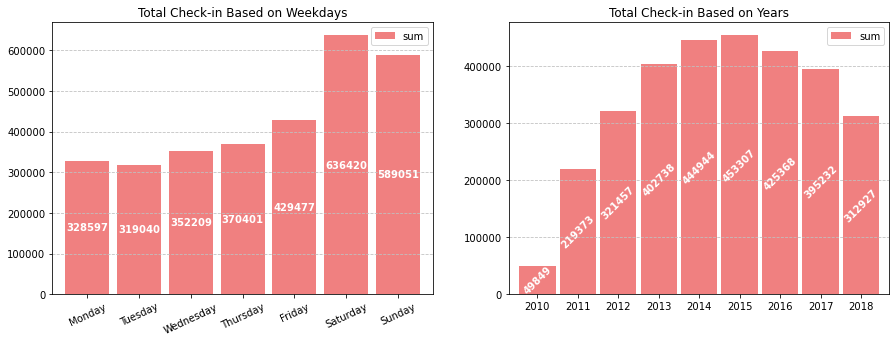

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

#Check-in Based on Weekdays
ax0 = ch_byweekday.plot(kind='bar',x='WeekDay',y='sum',ax=axs[0],color='lightcoral',rot=25,width=0.85)
for container in ax0.containers:
    ax0.bar_label(container,label_type='center',color='white',weight='bold')
ax0.set_title('Total Check-in Based on Weekdays')
#ax1 = ch_bymonth.plot(kind='bar',x='month',y='sum',ax=axs[1,[0,1]],color='r')
ax0.set(xlabel='')
ax2 = ch_byyear.plot(kind='bar',x='year',y='sum',ax=axs[1],color='lightcoral',width=0.9,rot=0)
for container in ax2.containers:
    ax2.bar_label(container,label_type='center',color='white',weight='bold',rotation=45)
ax2.set_title('Total Check-in Based on Years')
ax2.set(xlabel='')
ax_list = [ax0,ax2]
for ax in ax_list:
    ax.yaxis.grid(color='silver',which='major',linestyle='--')

### 1.10- Create Check-in Frequency <a name='p1h1s10'></a>

In [12]:
ch_freq = check_t_2015.T

ch_freq.reset_index(inplace=True)

for i in range(1,len(ch_freq.columns)):
    ch_freq.iloc[0,i] = ch_freq.iloc[0,i].date()

ch_freq.columns = ch_freq.iloc[0,:]

ch_freq.drop(0,axis=0,inplace=True)
ch_freq.rename(columns={'Date':'business_id'},inplace=True)
ch_freq.replace(ch_freq.iloc[0,1],0,inplace=True)
ch_freq['ch_freq'] = (np.count_nonzero(ch_freq,axis=1) / (len(ch_freq.columns)-1) )

ch_freq = ch_freq[['business_id','ch_freq']]
#Save ch_freq as ch_freq.csv
#ch_freq.to_csv('check_6_freq.csv')

#Create ch_freq 2015, also with b_num
ch_freq_2015 = ch_freq.merge(b_id_NZ_df)
#Save ch_freq_2015 as check_7_freq_2015.csv
#ch_freq_2015.to_csv('check_7_freq_2015.csv')
ch_freq_2015

,business_id,ch_freq,b_num
0,-0tgMGl7D9B10YjSN2ujLA,0.183562,0
1,-1UMR00eXtwaeh59pEiDjA,0.372603,1
2,-1VaIJza42Hjev6ukacCNg,0.200000,2
3,-faYl3ejjjm7ciR_j1ke7A,0.145205,3
4,-4TMQnQJW1yd6NqGRDvAeA,0.279452,4
...,...,...,...
2256,zqNgwQjj0_XAll-neGikIw,0.328767,2256
2257,zrMGL9riavdJR4olXaACOQ,0.150685,2257
2258,ztP466jMUMtqLwwHqXbk9w,0.358904,2258
2259,zwNLJ2VglfEvGu7DDZjJ4g,0.194521,2259


## 2 Business

### Read & Normalize

In [13]:
#1.1 Read Original File & Normalize
bus = pd.read_csv('bus_az_open.csv')
bus = pd.json_normalize(bus.j.apply(json.loads))
bus

,city,name,stars,state,address,is_open,latitude,longitude,categories,business_id,...,attributes.Corkage,attributes.BYOBCorkage,attributes.ByAppointmentOnly,attributes.DietaryRestrictions,attributes.BYOB,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.AcceptsInsurance,attributes.RestaurantsCounterService,attributes.Open24Hours
0,Phoenix,Taco Bell,3.0,AZ,2450 E Indian School Rd,1,33.495194,-112.028588,"Restaurants, Breakfast & Brunch, Mexican, Taco...",1Dfx3zM-rW4n-31KeC8sJg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Phoenix,Nee House Chinese Restaurant,3.5,AZ,"13843 N Tatum Blvd, Ste 15",1,33.613020,-111.977036,"Chinese, Restaurants",44YFU284Z3KDEy25QyVoUw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Phoenix,Vals Getaway DES Cafeteria,3.0,AZ,1789 W Jefferson,1,33.446806,-112.097129,"Restaurants, Food, Cafes",ysfeDcLAYk_MVzfBmyiSTg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scottsdale,Salt Cellar,3.5,AZ,550 N Hayden Rd,1,33.454286,-111.909405,"Seafood, Restaurants",nsNONDHbV7Vudqh21uicqw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Phoenix,Sushi Mocorito,3.0,AZ,"3415 West Glendale Ave, Bldg 25A",1,33.537164,-112.132926,"Restaurants, Mexican, Sushi Bars",Rs8Wi4OEjeOX7LVlzsXDOA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Scottsdale,Cherry On Top,4.0,AZ,"32421 N Scottsdale Rd, Ste 115",1,33.779794,-111.923232,"Ice Cream & Frozen Yogurt, Restaurants, Food",pGqIAjF_Ss2-yGznqg03_w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,Phoenix,Subway,2.0,AZ,"4747 E Elliot Rd, Ste 33",1,33.347499,-111.981221,"Restaurants, Sandwiches, Fast Food",3xI0ToitrAJkrUSH4gbmCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7677,Peoria,Razzleberriez Frozen Yogurt,4.0,AZ,25225 North Lake Pleasant Pkwy,1,33.713475,-112.269849,"Ice Cream & Frozen Yogurt, Specialty Food, Res...",3lhLsfwnQ1ziGuME_qDNKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,Gilbert,Pomo Pizzeria Gilbert,4.0,AZ,"366 N Gilbert Rd, Ste 106",1,33.356542,-111.790019,"Restaurants, Italian, Pizza",_r-OvLO5wqncmsBCg3i0qw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 Add Chain Data

In [14]:
#Whether Restaurant is A Chain or Not
name_value_count = bus.name.value_counts().to_frame().reset_index().rename(columns={'name':'count','index':'name',})
name_value_count.sample(5)
bus = pd.merge(bus, name_value_count, on='name')
for i in range(len(bus)):
    if bus.loc[i,'count'] > 1:
        bus.loc[i,'is_chain'] = 1
    else:
        bus.loc[i,'is_chain'] = 0
bus.drop(columns='count',inplace=True)
bus.loc[:,['name','is_chain']].sample(5)

,name,is_chain
1644,Wendy's,1.0
5564,Modern Tortilla Food Truck and Catering,0.0
4150,Cafe Roma,1.0
6972,Waffle Love - AZ Truck,0.0
4109,America's Taco Shop,1.0


### 1.2 Filter only for 2015

In [15]:
#Filter only for 2015
b_id_NZ_df = pd.read_csv('b_id_NZ_df.csv')
b_id_NZ_df.drop(['Unnamed: 0'], axis=1, inplace=True)
bus = bus.merge(b_id_NZ_df, on='business_id')

#Save This File as bus_1_2015.csv
#bus.to_csv('bus_1_2015.csv', index=False)
bus

,city,name,stars,state,address,is_open,latitude,longitude,categories,business_id,...,attributes.ByAppointmentOnly,attributes.DietaryRestrictions,attributes.BYOB,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.AcceptsInsurance,attributes.RestaurantsCounterService,attributes.Open24Hours,is_chain,b_num
0,Chandler,Taco Bell,2.5,AZ,2930 S Alma School Rd,1,33.262945,-111.859600,"Fast Food, Restaurants, Tex-Mex, Mexican",xDHuJaOQ5HqaLP0zgpJD9w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2173
1,Tempe,Taco Bell,3.0,AZ,1674 E Southern Ave,1,33.393200,-111.911020,"Mexican, Tex-Mex, Fast Food, Restaurants",1pytOeO_PhT4EVpk2MXQBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,118
2,Phoenix,Taco Bell,4.0,AZ,1909 West Deer Valley Rd,1,33.683674,-112.100217,"Tex-Mex, Fast Food, Mexican, Restaurants",okX1jSK4-4uPdglVFNYhSw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1855
3,Scottsdale,Taco Bell,3.5,AZ,7847 E Mc Dowell Rd,1,33.465550,-111.911530,"Mexican, Restaurants, Tex-Mex, Fast Food",aRis16GBg7iOeNGpLcVcjw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1363
4,Phoenix,Taco Bell,3.0,AZ,2465 E Baseline Rd,1,33.377690,-112.030320,"Restaurants, Mexican, Tex-Mex, Fast Food",EYWaN9sLjVYdi7fKIRguVA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,Mesa,Zushi Japanese Bistro,3.5,AZ,6727 E McDowell Rd,1,33.464844,-111.685553,"Teppanyaki, Cocktail Bars, Nightlife, Sushi Ba...",s3AG8m6Pzq-vON729pf0gw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1971
2256,Tempe,Med Fresh Grill,3.5,AZ,"414 S Mill Ave, Ste 117",1,33.425959,-111.940263,"Mediterranean, Restaurants, Turkish",-tcJmqzfaeEnpFMAelB7bA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50
2257,Goodyear,Ada's Fish Fry,4.0,AZ,"14960 W Indian School Rd, Ste 380",1,33.492340,-112.380230,"Restaurants, American (New), Sandwiches, Seafo...",_VIIuz9CAt68Hb54hQmpXA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1332
2258,Avondale,Pita Kitchen - Avondale,4.5,AZ,"9915 W McDowell Rd, Ste 104",1,33.464143,-112.273057,"Greek, Restaurants, Middle Eastern, Mediterran...",KOEBBp2PhiV_4PkW9eo9Sg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,777


### 1.2 Distance to Center

In [16]:
#1.2 Distance to City Center
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km
                   
bus['haversine_dist'] = haversine_vectorize(bus['longitude'],bus['latitude'],-112.0752558099556,33.44841768631837)
bus.loc[:,['business_id','haversine_dist']].sample(5)

,business_id,haversine_dist
578,PERCOYjFcIkwTaqOWz9G6w,21.636931
1765,mUVAMNN7BCQ9HGA9w_7C1g,9.534732
1925,-ubMwuskT2uS0GPSZpxaxA,21.296640
97,orGCyrtYZl9JOV5XIgxJEg,23.589523
248,93E1eOQ2bQG0OyIMqdcTvg,22.604250


### 1.3 Add Income & Population

In [17]:
# Income and Population Data for 2015
#Source for income is http://www.usa.com/rank/arizona-state--per-capita-income--zip-code-rank.htm?yr=9000&dis=&wist=&plow=&phigh=
income = pd.read_csv('Income_Az.csv')
income.reset_index(drop=True,inplace=True)
income['zip'] = income['zip'].astype(int, errors = 'raise')
bus.rename(columns={'postal_code':'zip'},inplace=True)
bus['zip'] = bus['zip'].astype(int, errors = 'ignore')
bus = pd.merge(bus, income ,on= 'zip',how='left')

#No Population & income info for 5 restaurants, so drop them
bus.drop(bus[bus.population.isnull()].index,inplace=True)
bus.reset_index(drop=True,inplace=True)

#Since we dropped 5 businesses, also drop them from business_id_NZ_df, and save it as b_id_NZ_df_2.csv
b_id_NZ_df_2 = bus.loc[:,['business_id','b_num']]
b_id_NZ_df_2.reset_index(drop=True,inplace=True)
b_id_NZ_df_2.to_csv('b_id_NZ_df_2.csv')

bus.loc[:,['business_id','zip','pc_income']].sample(5)

,business_id,zip,pc_income
187,50NTSGbZ3pN5643_K1IReA,85020,29253.0
2001,F-ULgBFmiSqG9udQmu6CCw,85006,12083.0
1767,OGRB__fguKfGpPdH7FvBDA,85004,27241.0
2018,cKRMmytHxaSt8F0SMEzKqg,85023,27228.0
223,vrKcFQPxj1Zzyj93yl-t6g,85295,32827.0


### 1.6 Attributes Fix for Parking & Ambiance & GoodForMeal

In [ ]:
def Att_Fix(data,attribute_name):
    data[attribute_name] = data[attribute_name].astype('str')
    data[attribute_name] = data[attribute_name].replace({'\'': '"'},regex=True)
    att_list = []
    value_list = []
    df = pd.DataFrame()
    for i in range(len(data)):
        df.loc[i,'business_id'] = data.loc[i,'business_id']
        pos_colon = [m.start() for m in re.finditer(':',data.loc[i,attribute_name])]
        pos_dq = [m.start() for m in re.finditer('"',data.loc[i,attribute_name])]
        pos_comma = [m.start() for m in re.finditer(',',data.loc[i,attribute_name])]
        pos_comma.append(len(data.loc[i,attribute_name])-1)
        for j in range(len(pos_colon)):
            j1 = j*2
            j2 = (j*2 + 1)
            att = data.loc[i,attribute_name][pos_dq[j1]+1:pos_dq[j2]]
            att_list.append(att)

            value = data.loc[i,attribute_name][pos_colon[j]+2:pos_comma[j]]
            value_list.append(value)
            pos1 = attribute_name.find('.')
            attribute_name_2 = attribute_name[pos1+1:]
            att_name = str(attribute_name_2) + '_' + att
            df.loc[i,att_name] = value

        df = df.fillna(0)
        df.replace({False: 0, True: 1,'False':0, 'True':1, 'None':0},inplace=True)
    
    return df

parking_df = Att_Fix(bus,'attributes.BusinessParking')
bus = pd.merge(bus,parking_df, on='business_id')
ambiance_df = Att_Fix(bus,'attributes.Ambience')
bus = pd.merge(bus,ambiance_df, on='business_id')
meal_df = Att_Fix(bus,'GoodForMeal')
bus = pd.merge(bus,meal_df, on='business_id')

In [19]:
#Check BusinessParking
bus.iloc[:,64:69].sample(5)

,population,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot
1218,38082.0,0,0,0,1
1994,36755.0,0,0,0,1
1216,20479.0,0,0,0,1
863,4932.0,0,0,0,0
7,37550.0,0,0,0,1


In [20]:
#Check Ambiance
bus.iloc[:,70:77].sample(5)

,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy
900,0,0,0,0,0,0,0
332,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0
967,0,0,0,0,1,0,0


In [ ]:
#Check GoodForMeal
bus.iloc[:,-6:].sample(5)

### 1.7 Wifi & Alcohol Fix

In [22]:
#Fix Wifi Column and Preview
bus['attributes.WiFi'].replace({
"u'free'": 1,
"u'no'": 0,
"'free'":1,
"'no'":0,
"u'paid'":1,
"'paid'":1,
'None':0},inplace=True)

bus['attributes.Alcohol'].replace({
"'beer_and_wine'": 1,
"u'no'": 0,
"'full_bar'":1,
"'no'":0,
"u'full_bar'":1,
"u'beer_and_wine'":1,
'None':0,
"'none'":0,
"u'none'":0},inplace=True)

bus.loc[:,['business_id','attributes.WiFi']].sample(5)

,business_id,attributes.WiFi
1840,ARWLV46iIa3Dvt1y8-SPpA,0.0
1288,DstNnjUe4RpBuKUqLdFzyQ,1.0
1802,FogTa-wmjhVnJCoTiaxvZA,1.0
2016,LH8S1sUwxg2_TotePOFLvg,1.0
507,0xyqLvtr0Zbr4G-gML-QmQ,1.0


### 1.8 Categories List to Columns

In [23]:
#Business Categories 
list_string = bus['categories'].str.cat(sep=',')
list_split = list_string.split(',') #211050
list_split_all = [x.strip(' ') for x in list_split] # Take Spaces
count = Counter(list_split_all)
unique_list = list(count.keys())
most_frequent = count.most_common(20) #Change i to get i different categories
bus_cat_unique = pd.DataFrame(most_frequent,columns=['Categories','count'])
bus_cat_unique = bus_cat_unique[bus_cat_unique['Categories'] != 'Restaurants']
bus_cat_unique.reset_index(inplace=True,drop='index')
bus_cat_unique.sort_values('count',inplace=True,ascending=False)
bus_cat_unique.drop(index=bus_cat_unique.index[0], 
        axis=0, 
        inplace=True)
bus_cat_unique.reset_index(inplace=True,drop=True)

#Categories List to Columns
cat_list = bus_cat_unique.iloc[:,0].to_list()

for i in range(len(bus)):
    for j in cat_list:
        name = str('c_') + j
        if j in bus.iloc[i,8]:
            bus.loc[i,name] = 1
        else:
            bus.loc[i,name] = 0

### 1.9 Fix City Names

In [24]:
#Make All Start with Capital Letter
for i in range(len(bus)):
    bus.loc[i,'city'] = bus.loc[i,'city'].title()

### 1.10 Additional Changes for Attributes

In [ ]:
#Additional Changes for Attributes
bus.drop(columns=['','Ambience','BusinessParking','RestaurantsAttire'],inplace=True)

bus.rename(columns={'_breakfast':'GFM_breakfast',
 '_brunch':'GFM_brunch',
 '_dessert':'GFM_dessert',
 '_dinner':'GFM_dinner',
 '_latenight':'GFM_latenight',
 '_lunch':'GFM_lunch'},inplace=True)

#bus.to_csv('bus_3_2015.csv',index=False)

## 3 Photo

### 3.1 Photo Compliment

In [26]:
photo_comp = pd.read_csv('photo_az_compliment.csv')
photo_comp.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
photo_comp.sample(5)

,business_id,1_count,2_count,3_count,4_count,5_count,6_count,7_count,8_count,9_count,10_count,11_count,12_count,13_count,14_count,15_count
6444,WR2J_AufGGdPrJobNb5GHw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
550,4NpySSkznGaRVye30Pvdzg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,1YQaI6yyWa8jSzP0jJX0tw,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2329,EuPaczO6rMpDMrn-GtE_eA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3385,jgBL42OGQp3AJHNEX8VuoA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 Photo Table

In [27]:
# Read, filter to 2015 and Preview Photo Table
photo = pd.read_csv('photo_az_open.csv')
photo.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
#Filter it for 2015, and save as photo_2015.csv
photo_2015_NZ = photo.merge(b_id_NZ_df_2, on='business_id')
photo_2015_NZ.to_csv('photo_2015_NZ.csv',index=False)
photo_2015_NZ.sample(5)

,business_id,photo_count,inside_count,outside_count,food_count,drink_count,menu_count,b_num
1482,KH9XgG2nt0G6bk8-NKkQQQ,2,1,0,1,0,0,773
576,qOd7QUh-sIB7zN7RbP1-qw,9,5,0,4,0,0,1917
1732,VoayviMR2sm4C0CSh_I8Nw,1,1,0,0,0,0,1163
1068,p3lATlh-DKgGMZyzMfp-Ng,4,1,0,3,0,0,1869
999,UESdOMLsXn_7WcwOZt7I3A,5,0,2,2,1,0,1110


## 4 Review & Users

### 4.1 Review - Read and Filter for 2015 & NZ Businesses

In [28]:
review = pd.read_csv('review_az_open.csv')
review.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
#After Read it, first for 2015, and then Filter for Monthly NZ businesses, 

start_date = pd.to_datetime('01/01/2015')
end_date = pd.to_datetime('01/01/2016')
review['date'] = pd.to_datetime(review['date']).dt.normalize()
review_2015 = review.loc[(review['date'] >= start_date) & (review['date'] < end_date)].sort_values('date')
review_2015.reset_index(drop=True,inplace=True)

b_id_NZ_df_2 = pd.read_csv('b_id_NZ_df_2.csv')
b_id_NZ_df_2.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
review_2015_NZ = pd.merge(review_2015, b_id_NZ_df_2 ,on= 'business_id')
#Save This as review_2015_NZ.csv
#review_2015_NZ.to_csv('review_2015_NZ.csv',index=False)

In [29]:
#Preview All Reviews (before Filter)
review

,date,business_id,cool,useful,stars,user_id,funny,text
0,2018-03-06,Ap17p-tA4Ipzy1s35DfCfg,0,0,5.0,MUq3DlU0YeDHb1yG8tvfHA,0,Buck & Rider is amazing for their food and ser...
1,2017-09-11,OBnqMdIsS8vWPrzPtnlb-w,0,0,5.0,4ylg0SlpEuyOJF_c8b06cw,0,"Amazing! Food is authentic and inexpensive, th..."
2,2015-05-02,QYIhMNwxXejDoCr-F1BxDg,0,0,4.0,VHaIHQZYevvanHSzMHMVcQ,0,First time here and I was very impressed. Star...
3,2016-08-28,aXiXvy5cBMeb6m2j7WFuzg,0,1,5.0,TMaBWSv75DEuXyZlGJj6cg,0,Everything I consumed from this place was amaz...
4,2015-02-25,0Ryxx6uSpt4TOKYVGBekLQ,0,0,1.0,Tmw8c42MbUC968uKahphAw,0,I don't write reviews unless they are positive...
...,...,...,...,...,...,...,...,...
1013461,2017-06-13,fnPefa87H-3CJnDungeetQ,0,0,1.0,jrme91vu5xKwY1U2-ljlqA,0,"Just terrible.....the new ""All Crust Pizza""......"
1013462,2017-02-24,wu5nk3pY1e_ou_Le_U52Sw,0,0,5.0,Wv0-jQ_XHF6LX0mfXqTCjw,0,Awesome unique sandwiches that are 2 full meal...
1013463,2017-08-02,mZK8IBkMFzOX2UmA7_BylA,1,1,5.0,NEgAr1eamnNR-mDI9aGXNQ,0,"I'm only giving a 5 star based on the service,..."
1013464,2017-07-22,fVJszMsossyPFYEgw1dQ0Q,0,1,1.0,zY_G0IOSD-CfKWB377JU5w,1,Went through the drive through and they didn't...


In [30]:
#Preview Reviews for 2015 NZ businesses, almost 10% of All Reviews
review_2015_NZ.sample(10)

,date,business_id,cool,useful,stars,user_id,funny,text,b_num
45577,2015-02-15,7OQ7lhIsjLSmf-3012LAuw,0,0,3.0,Y_qaz7LyZJSOPUIPs_nHVA,0,OK so today was better service than yesterday ...,309
100172,2015-03-29,fBxDUu5ftmNHbbX5qD_FcA,0,0,5.0,nL3z0_maE6ePL0m5eCUN_A,0,Was in Tempe for Spring Training. First time a...,1515
80980,2015-01-31,tAEKCC7h9h9A79SfYx0Prg,0,0,5.0,o0bwhmru0iNyAEdLE1NPng,0,Omg every time I go to Ling and Louie's they N...,2011
99063,2015-12-27,nztjmkY4LZp18kviHIO7ow,0,4,2.0,EYxJqFgSvQPQ1BukYWHfnA,1,Now I should perhaps preface this review by sa...,1822
108130,2015-08-29,Mh2syFX0bG-7vylKY9DE4g,0,1,2.0,n0K-YWuQGaaGZwL_Zr0JXA,0,"No offense, but the wait for delivery was 70 m...",853
27976,2015-06-29,9nHpqlu7be1466wdo_t5kQ,0,1,3.0,8P1jJnCZLrPNLiXqkTaZ5A,1,This rating is based off of two visits our fam...,394
107573,2015-09-13,mdUjJFZaQoydAGadzFuFtg,4,5,4.0,5UYjT5YDKSuApFax2t2eqg,0,C just finished with rehearsal & needed lunch ...,1777
79509,2015-05-14,sQ6DZZLLJRfwUr0eDWKDDg,0,0,1.0,0MEPdoC5XcphVxesfCnmPg,0,This is most certainly the worse Chinese I hav...,1989
100379,2015-06-19,3JxKzWquEbPC3yPIfoCiLw,0,0,3.0,JK0RD8rhwP6uYmgiRVNrVg,0,We eat here a couple time a month. Usually ve...,165
108004,2015-06-14,2pWFsnqMlYSPFGUF4Vv38Q,2,1,5.0,GsmxAH8F-fVIY7m-ic9QBw,1,Went on a Saturday night. The place is clean a...,143


#### 4.1.2 Create b_id_NZ_df_3

In [31]:
#Number of Unique Businesses dropped to 1793, so save them as b_id_NZ_df_3.csv

#Add Unique values of business_id in review_nz_2015 to a new dataframe
b_id_nz_3_df = pd.DataFrame(list(review_2015_NZ['business_id'].unique()))
b_id_nz_3_df.rename(columns={0:'business_id'},inplace=True)

b_id_nz_3_df = b_id_nz_3_df.merge(review_2015_NZ[['business_id','b_num']],on='business_id',how='left')
#Drop Duplicates
b_id_nz_3_df.drop_duplicates(inplace=True)
b_id_nz_3_df.reset_index(drop=True,inplace=True)
#b_id_nz_3_df.to_csv('b_id_NZ_df_3.csv',index=False)

### 4.2 Read Users

In [32]:
users = pd.read_csv('users_az_open.csv')
users.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
users

,user_id,name,review_count,yelping_since,friends_count,useful_count,cool_count,fans,elite,avg_stars,funny_count
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08,98,84,25,5,"2015,2016,2017",4.03,17
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21,1151,48,16,4,NaN,3.63,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04,14,28,10,0,NaN,3.71,8
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22,524,30,14,5,NaN,4.85,4
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23,230,1114,665,39,"2015,2016,2017,2018",4.08,279
...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,2016-02-24,0,0,0,0,NaN,4.50,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,2017-02-25,0,0,0,0,NaN,4.00,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,2009-08-19,0,8,0,0,NaN,3.40,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,2018-10-15,0,1,0,0,NaN,3.00,0


### 4.3 Add Gender for Users

In [33]:
# Get gender for All & Show Value Count
import gender_guesser.detector as gender
d = gender.Detector()
users.loc[:,'gender'] = users.loc[:,'name'].map(lambda x: d.get_gender(x))
users.gender.value_counts()

female           639576
male             556370
unknown          261299
mostly_female     87294
mostly_male       68210
andy              24389
Name: gender, dtype: int64

#### Fix Genders to Categorize

In [34]:
users.replace({'female':'F','male':'M','mostly_female':'F','mostly_male':'M','andy':'unknown'},inplace=True)

### 4.4 Filter Users for 2015

In [35]:
#Since our analysis on 2015, only works with users who starts yelping before 2015.
end_date = pd.to_datetime('01/01/2015')
users['yelping_since'] = pd.to_datetime(users['yelping_since']).dt.normalize()
users_2015 = users.loc[(users['yelping_since'] < end_date)]
#users_2015.to_csv('users_2015.csv')
users_2015

,user_id,name,review_count,yelping_since,friends_count,useful_count,cool_count,fans,elite,avg_stars,funny_count,gender
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08,98,84,25,5,"2015,2016,2017",4.03,17,F
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21,1151,48,16,4,NaN,3.63,22,F
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04,14,28,10,0,NaN,3.71,8,M
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22,524,30,14,5,NaN,4.85,4,F
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23,230,1114,665,39,"2015,2016,2017,2018",4.08,279,F
...,...,...,...,...,...,...,...,...,...,...,...,...
1637127,jFdjTXrUIBRZYDYlJXeWlg,K,3,2014-08-27,0,0,0,0,NaN,5.00,0,unknown
1637128,aEs0rWXz86cHpKeqLEJH5g,Sarah,31,2012-04-05,0,12,4,0,NaN,4.38,5,F
1637129,5AKN9P61NGv6WAceYsJq7w,Tony,1,2013-09-20,0,2,1,0,NaN,2.00,1,M
1637132,G2HQPImwW6kosWptBEbqrw,Michelle,2,2013-10-09,0,0,0,0,NaN,4.50,0,F


#### Gender Graph

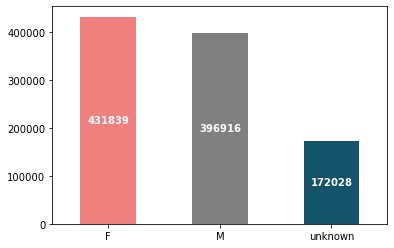

In [36]:
ax0 = users_2015.groupby('gender').size().plot(kind='bar',rot=0,color=['lightcoral','grey','#145369'],xlabel='')
for container in ax0.containers:
    ax0.bar_label(container,label_type='center',color='white',weight='bold')

#### 4.4.1 Add User's Number of Rev in 2015

In [37]:
u_rev_count_2015 = review_2015_NZ.groupby('user_id').size().to_frame().reset_index().rename(columns={0:'u_review_count_2015'})
users_2015 = users_2015.merge(u_rev_count_2015,on='user_id',how='left')

#### 4.4.2 Create NZ User List

In [38]:
#Users that have at least 1 fans, funny, cool, useful, and review 
users_2015_NZ = users_2015[(users_2015['fans'] != 0)
& (users_2015['funny_count'] != 0)
& (users_2015['cool_count'] != 0)
& (users_2015['useful_count'] != 0)
& (users_2015['friends_count'] != 0)
& (users_2015['review_count'] != 0)]
users_2015_NZ.reset_index(drop=True,inplace=True)
users_2015_NZ

,user_id,name,review_count,yelping_since,friends_count,useful_count,cool_count,fans,elite,avg_stars,funny_count,gender,u_review_count_2015
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08,98,84,25,5,"2015,2016,2017",4.03,17,F,NaN
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21,1151,48,16,4,NaN,3.63,22,F,1.0
2,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22,524,30,14,5,NaN,4.85,4,F,NaN
3,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23,230,1114,665,39,"2015,2016,2017,2018",4.08,279,F,NaN
4,0rK89TS8xqy1wI4nYI1wfw,Marilyn,214,2011-06-23,5449,3475,3048,186,"2015,2016,2017,2018",4.20,2424,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228682,rlmg0UUK7Nf3un69DFhw6g,Stephanie,80,2008-05-19,1,55,15,2,NaN,3.99,7,F,NaN
228683,5uPJ6try4np37ICIvb_Glg,Judy,52,2010-03-08,18,116,4,3,NaN,2.57,10,F,NaN
228684,KhzTmXUCXIm4sLE4gxZg0g,Paul,45,2013-09-28,1,20,3,2,NaN,3.50,1,M,NaN
228685,mSaD4g37jCy4-95pB6NWKA,Suzy,74,2010-03-15,1,46,20,1,2018.0,4.42,6,F,NaN


### 4.5 Merge User and Review Files, for 2015

In [41]:
review_user_2015 = pd.merge(review_2015_NZ, users_2015, on='user_id')
review_user_2015.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
review_user_2015.sample(5)

,date,business_id,cool,useful,stars,user_id,funny,text,b_num,name,...,yelping_since,friends_count,useful_count,cool_count,fans,elite,avg_stars,funny_count,gender,u_review_count_2015
39571,2015-11-21,K-uQkfSUTwu5LIwPB4b_vg,1,0,5.0,kOMzDmy9_nrzpgWOA05mlA,0,Amazing food and margaritas! We had the steak ...,767,Angela,...,2011-08-12,363,10,2,4,NaN,4.08,1,F,1.0
7339,2015-06-07,gotvSVEaPn_qHasAU33ejg,3,4,5.0,g9KzKQHuHfUE85nnUPCKfA,2,Ruchi is amazing! We stopped in for the lunch...,1583,Chris,...,2009-07-26,67,82,30,4,NaN,3.95,20,M,11.0
37979,2015-01-13,tCJGEQVqjELLYv3fPNX5Rw,0,4,1.0,wZmlHaJjonSa09T11VgHpQ,1,It's really difficult to find a decent steak h...,2012,Yu,...,2013-12-20,19,4,0,0,NaN,1.00,1,unknown,1.0
85133,2015-02-23,UAE4XWXwlALJsq8yycmW5w,1,1,5.0,xg0oOzzMXAxJAZU57KDXnA,1,Love the V12 salad - good for you and tastes i...,1107,Kim,...,2012-08-12,2,3,1,0,NaN,5.00,1,F,1.0
27728,2015-06-13,82I9SSilxh3zL8F1UQ45Xw,0,1,1.0,Kgmvv8Y7WJLNOvbIiKHCoA,1,Where to start. A. Slow service. B. Everything...,327,Art,...,2009-04-16,3,412,82,2,NaN,3.64,84,M,25.0


#### 4.5.1 Create b_id_NZ_df_4

In [42]:
#Number of Unique Businesses dropped to 1790, so save them as b_id_NZ_df_4.csv

#Add Unique values of business_id in review_nz_2015 to a new dataframe
b_id_nz_4_df = pd.DataFrame(list(review_user_2015['business_id'].unique()))
b_id_nz_4_df.rename(columns={0:'business_id'},inplace=True)

b_id_nz_4_df = b_id_nz_4_df.merge(review_user_2015[['business_id','b_num']],on='business_id',how='left')
#Drop Duplicates
b_id_nz_4_df.drop_duplicates(inplace=True)
b_id_nz_4_df.reset_index(drop=True,inplace=True)
#b_id_nz_4_df.to_csv('b_id_NZ_df_4.csv',index=False)

### 4.6 Sentiment Analysis on Reviews

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(_stop_words.ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(review_user_2015.loc[100001:,'text'])
#cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

# Important to select data to use in analysis
data_to_use = review_user_2015.loc[:,'text']
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(data_to_use)
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = data_to_use.apply(sid.polarity_scores)
#review_2015_NZ = review_2015_NZ.set_index('date')
review_user_2015.loc[:,'sentiment_score'] = sentiment_scores.apply(lambda x: x['compound'])
#monthly_sentiment = sentiment.resample('M').mean()

In [ ]:
#Create New Dataframe review_user_2015_sent, with sentiment scores
review_user_2015_sent = review_user_2015.copy()

#Add rev_id for each review, and save DataFrame XX
review_user_2015_sent.reset_index(drop=True,inplace=True)
review_user_2015_sent['rev_id'] = review_user_2015_sent.index
#review_user_2015_sent.to_csv('review_user_2015_sent.csv',index=False)

#Also save rev_id and sentiment score only DataFrame
review_user_2015_sent[['rev_id','sentiment_score']].to_csv('review_sentscore_revid.csv',index=False)

### 4.7 Rev_Users AVG

In [ ]:
# Further Fixes on Review_User File
review_user_2015_sent = pd.read_csv('review_user_2015_sent.csv')
#1 Add How Many month that users have been yelping
review_user_2015_sent['yelping_since'] = pd.to_datetime(review_user_2015_sent['yelping_since'])
review_user_2015_sent['date'] = pd.to_datetime(review_user_2015_sent['date'])

review_user_2015_sent['yelping_month'] = review_user_2015_sent['date'].dt.to_period('M').astype(int) - \
    review_user_2015_sent['yelping_since'].dt.to_period('M').astype(int)

#2 Add Whether Users is Elite or not in 2015
review_user_2015_sent['elite'] = review_user_2015_sent['elite'].astype(str)

for i in range(len(review_user_2015_sent)):
    if '2015' in review_user_2015_sent.loc[i,'elite']:
        review_user_2015_sent.loc[i,'is_elite_2015'] = 1
    else:
        review_user_2015_sent.loc[i,'is_elite_2015'] = 0

#3 Replace Naming for Genders
review_user_2015_sent.replace({'female':'F','male':'M','mostly_female':'F','mostly_male':'F','andy':'nan','unknown':'nan'},inplace=True)

#4 Add True Star, which is difference of star on review and avg. star of that user.
review_user_2015_sent['true_star'] = review_user_2015_sent['stars'] - review_user_2015_sent['avg_stars']


#5 Get Mean Values for each business in each features, with avg. user values
rev_us_2015_avg = review_user_2015_sent.groupby('business_id').agg({'text':'count',
'cool':'mean',
'useful':'mean',
'stars':'mean',
'funny':'mean',
'review_count':'mean',
'friends_count':'mean',
'fans':'mean',
'true_star':'mean',
'avg_stars':'mean',
'sentiment_score':'mean',
'is_elite_2015':'mean',
'yelping_month':'mean',
'u_review_count_2015':'mean'})
rev_us_2015_avg.reset_index(inplace=True)
rev_us_2015_avg.rename(columns={'text':'rev_count',
'cool':'r_avg_cool',
'useful':'r_avg_useful',
'stars':'r_avg_stars',
'funny':'r_avg_funny',
'review_count':'u_avg_rev_count',
'friends_count':'u_avg_friend',
'fans':'u_avg_fans',
'true_star':'u_avg_true_star',
'avg_stars':'u_avg_avg_star',
'sentiment_score':'avg_sentiment_score',
'is_elite_2015':'u_avg_is_elite_2015',
'yelping_month':'u_avg_yelping_month'},inplace=True)

#6 Get Gender Count And Ratio 
rev_us_gend_count_m = pd.DataFrame(review_user_2015_sent.groupby('business_id').gender.apply(lambda x: x[x=='M'].count()))
rev_us_gend_count_f = pd.DataFrame(review_user_2015_sent.groupby('business_id').gender.apply(lambda x: x[x=='F'].count()))
rev_us_gend_count_m.reset_index(inplace=True)
rev_us_gend_count_f.reset_index(inplace=True)
rev_us_gend_count_m.rename(columns={'gender':'M_count'},inplace=True)
rev_us_gend_count_f.rename(columns={'gender':'F_count'},inplace=True)
rev_us_gend_count = pd.merge(rev_us_gend_count_f,rev_us_gend_count_m,on='business_id')
rev_us_gend_count['M/F Ratio'] = rev_us_gend_count['M_count'] / rev_us_gend_count['F_count']
rev_us_gend_count['M/F Ratio'] = rev_us_gend_count['M/F Ratio'].astype(float)
rev_us_gend_count = rev_us_gend_count.replace({np.inf:'0'})

#7 Merge With Rev-User File
rev_us_2015_avg = pd.merge(rev_us_2015_avg,rev_us_gend_count,on='business_id')
rev_us_2015_avg.drop(columns=['F_count','M_count'],inplace=True)

#8 Add Check Frequencies
rev_us_2015_avg = pd.merge(rev_us_2015_avg,ch_freq_2015,on='business_id')
rev_us_2015_avg['M/F Ratio'] = rev_us_2015_avg['M/F Ratio'].astype(float)

#Save Avg File as review_user_2015_avg.csv
rev_us_2015_avg.to_csv('review_user_2015_avg.csv',index=False)

rev_us_2015_avg

### 4.9 Daily Review Numbers

In [45]:
review_daily = review_user_2015_sent[['date','business_id']]
review_daily.date = review_daily.apply(lambda x: datetime.date(x['date']),axis=1)
review_daily = review_daily.groupby(['business_id','date']).size().unstack().reset_index()
#Save Review_Daily as review_daily.csv
review_daily.to_csv('review_daily.csv',index=False)

review_daily.head()

date,business_id,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,-1VaIJza42Hjev6ukacCNg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4TMQnQJW1yd6NqGRDvAeA,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
2,-9eNGMp8XiygI8t8QFuFWw,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,-9nai28tnoylwViuJVrYEQ,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,-Bdw-5H5C4AYSMGnAvmnzw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


## 5 Tips

In [46]:
tip = pd.read_csv('tip_az_open2.csv') #Previous one doesn't have dates
tip.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
tip

,business_id,date,tip,compliment_count,stars
0,5KheTjYPu1HcQzQFtm4_vw,2011-12-26,Good chips and salsa. Loud at times. Good serv...,0,3.5
1,5KheTjYPu1HcQzQFtm4_vw,2010-09-26,Queso Fundido is the best.,0,3.5
2,5KheTjYPu1HcQzQFtm4_vw,2013-12-13,FYI the green chilis are SPICY!!! I don't mind...,0,3.5
3,5KheTjYPu1HcQzQFtm4_vw,2012-03-29,This therapist is cheap. 99cent margaritas eve...,0,3.5
4,5KheTjYPu1HcQzQFtm4_vw,2012-08-09,Really great refried beans.,0,3.5
...,...,...,...,...,...
182102,471fUA9qM7oQtVmGdf_Y9g,2018-01-03,"Great location, seating for 16 and delivery as...",0,2.5
182103,X1r8ugVdi4r6siqkNmIkkg,2018-05-09,Best,0,5.0
182104,AQUa3o3wbv9mt8h9dCRUUQ,2018-09-15,Delicious and great for fighting local allergies!,0,5.0
182105,J2yHV9KNwBHD7bnGMANCpw,2016-08-23,Our family went here and really enjoyed our me...,0,4.5


In [47]:
#Filter it for 2015 NZ, and preview. %43 Decrease

start_date = pd.to_datetime('01/01/2015')
end_date = pd.to_datetime('01/01/2016')
tip['date'] = pd.to_datetime(review['date']).dt.normalize()
tip_2015 = tip.loc[(tip['date'] >= start_date) & (tip['date'] < end_date)].sort_values('date')
tip_2015.reset_index(drop=True,inplace=True)
tip_2015_NZ = tip_2015.merge(b_id_nz_4_df, on='business_id', how='inner')

tip_2015_NZ

,business_id,date,tip,compliment_count,stars,b_num
0,JwXNyXdJmk_YnXokLhpI8w,2015-01-01,Half expected Hawaiian shirts in here :p,0,3.0,763
1,JwXNyXdJmk_YnXokLhpI8w,2015-05-24,The katsu is our favorite!,0,3.0,763
2,JwXNyXdJmk_YnXokLhpI8w,2015-11-12,Fire chicken is great!,0,3.0,763
3,sQ6DZZLLJRfwUr0eDWKDDg,2015-01-01,Yum,0,4.0,1989
4,sQ6DZZLLJRfwUr0eDWKDDg,2015-02-16,Kung Pow Chicken & Orange Chicken\nTasty!!!,0,4.0,1989
...,...,...,...,...,...,...
14626,b3zsV44_SBz5JLwyfiHsRA,2015-12-09,Meeting good friends here,0,3.5,1384
14627,p8H_WsH1SltPmo0-c67gFQ,2015-12-20,Get the Haystack Onion Rings!,0,3.0,1872
14628,TKp9PDs8jFbshfg6xOcM6A,2015-12-21,bloomin onion!,0,3.0,1075
14629,0pazeZax1Nt9cn0U_8aSUQ,2015-12-29,Great authentic Thai food. Pad Thai chicken...,0,3.5,87


### 5.1 Sentiment Analysis on Tips

In [48]:
# Cleaning
tip_2015_NZ['tip'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in tip_2015_NZ['tip']]
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(_stop_words.ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(tip_2015_NZ.loc[:,'tip'])
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(tip_2015_NZ.loc[:,'tip'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
"""
from nltk.tokenize import sent_tokenize
df_good = review_2015_NZ.loc[:5000][review_2015_NZ['stars'] >= 4]
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
import re
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean, size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['good'], topn=10)
"""
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Instantiate new SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# Generate sentiment scores
sentiment_scores = tip_2015_NZ.loc[:,'tip'].apply(sid.polarity_scores)
#review_2015_NZ = review_2015_NZ.set_index('date')
tip_2015_NZ.loc[:,'sentiment_score'] = sentiment_scores.apply(lambda x: x['compound'])
#monthly_sentiment = sentiment.resample('M').mean()

In [ ]:
#Add tip_id for each review, and save DataFrame
tip_2015_NZ['tip_id'] = tip_2015_NZ.index
tip_2015_NZ.to_csv('tip_2015_NZ.csv',index=False)

#Also save tip_id and sentiment score only DataFrame
tip_2015_NZ[['tip_id','sentiment_score']].to_csv('tip_sentscore_tipid.csv',index=False)

### 5.2 Daily Tip Numbers

In [49]:
tip_daily = tip_2015_NZ[['date','business_id']]
tip_daily.date = tip_daily.apply(lambda x: datetime.date(x['date']),axis=1)
tip_daily = tip_daily.groupby(['business_id','date']).size().unstack().reset_index()
#Save Review_Daily as review_daily.csv
tip_daily.to_csv('tip_daily.csv',index=False)

tip_daily.head()

date,business_id,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,-4TMQnQJW1yd6NqGRDvAeA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-9eNGMp8XiygI8t8QFuFWw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-9nai28tnoylwViuJVrYEQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-Bdw-5H5C4AYSMGnAvmnzw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-Dnh48f029YNugtMKkkI-Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# B - Descriptive Analysis <a name='p2'></a>

### Read Files

In [50]:
bus = pd.read_csv('bus_3_2015.csv')
bus.drop(columns='Unnamed: 0',inplace=True, errors='ignore')

b_id_NZ_df_4 = pd.read_csv('b_id_NZ_df_4.csv')
b_id_NZ_df_4.drop(columns='Unnamed: 0',inplace=True, errors='ignore')

#Even if b_id_NZ_df_5 will be created after the weather data drop,
#it will be used in Descriptive Analysis
b_id_NZ_df_5 = pd.read_csv('b_id_NZ_df_5.csv')
b_id_NZ_df_5.drop(columns='Unnamed: 0',inplace=True, errors='ignore')

bus = bus.merge(b_id_NZ_df_5, on=['business_id','b_num'], how='inner')
bus.reset_index(inplace=True,drop=True)
bus.columns = bus.columns.map(lambda x: x.removeprefix("attributes."))
bus.columns = bus.columns.map(lambda x: x.removeprefix("GoodForMeal"))

#check
check_dates = pd.read_csv('check_5_dates.csv')
check_dates.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
check_dates.date = pd.to_datetime(check_dates.date)
check_dates = check_dates.loc[check_dates.date.dt.year == 2015]

#check_t_2015 = pd.read_csv('check_t_2015.csv')
#check_t_2015.drop(columns='Unnamed: 0',inplace=True, errors='ignore')

check_weekly = pd.read_csv('check_2_2015_Weekly.csv')
check_weekly.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
check_weekly = check_weekly.merge(b_id_NZ_df_4, on='business_id', how='inner')

check_monthly = pd.read_csv('check_3_2015_Monthly.csv')
check_monthly.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
check_monthly = check_monthly.merge(b_id_NZ_df_4, on='business_id', how='inner')

#photo
photo = pd.read_csv('photo_2015_NZ.csv')
photo.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
photo = photo.merge(b_id_NZ_df_4, on=['business_id','b_num'], how='inner')
photo.reset_index(drop=True, inplace=True)

photo_comp = pd.read_csv('photo_comp_2015_NZ.csv')
photo_comp.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
photo_comp = photo_comp.merge(b_id_NZ_df_4, on=['business_id','b_num'], how='inner')
photo_comp.reset_index(drop=True, inplace=True)

#review-user
review_user = pd.read_csv('review_user_2015_sent.csv')
review_user.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
review_user = review_user.merge(b_id_NZ_df_4, on=['business_id','b_num'], how='inner')
review_user.reset_index(drop=True, inplace=True)

review_avg = pd.read_csv('review_user_2015_avg.csv')
review_avg.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
review_avg = review_avg.merge(b_id_NZ_df_4, on=['business_id','b_num'], how='inner')
review_avg.reset_index(drop=True, inplace=True)

#tips
tips = pd.read_csv('tip_2015_NZ.csv') 
tips.drop(columns='Unnamed: 0',inplace=True, errors='ignore')
tips = tips.merge(b_id_NZ_df_4, on=['business_id','b_num'], how='inner')
tips.reset_index(drop=True, inplace=True)

ch_freq = pd.read_csv('check_7_freq_2015.csv')
ch_freq.drop(columns='Unnamed: 0',inplace=True, errors='ignore')


### Number of Businesses in Each City

Text(0.5, 1.0, 'Number of Restaurant in Top 10 Cities')

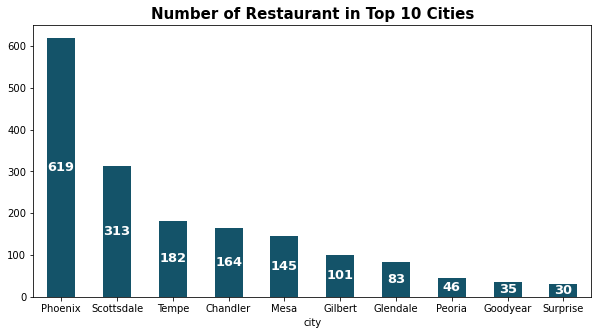

In [51]:
for i in range(len(bus)):
    bus.loc[i,'city'] = bus.loc[i,'city'].title()
bus.city.replace({'Scottdale':'Scottsdale'},inplace=True)

ax0 = bus.groupby('city').size().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,5),rot=0,color='#145369')
for container in ax0.containers:
    ax0.bar_label(container, label_type='center', fontsize=13,color='white', fontweight='bold')
ax0.set_title('Number of Restaurant in Top 10 Cities', fontsize=15, fontweight='bold')
#plt.savefig('Number of Restaurant in Top 10 Cities.png',dpi=300,bbox_inches='tight')

#### Ch_freq for each Cities

Text(0.5, 1.0, 'Average Check-in Frequency in Cities')

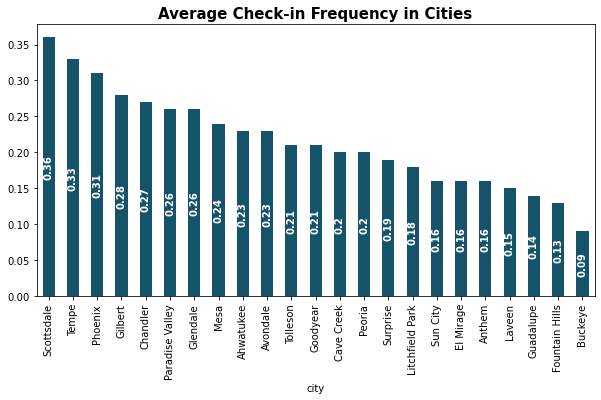

In [52]:
ax_c_c = round(bus.groupby('city')['ch_freq'].mean().sort_values(ascending=False),2).plot(kind='bar',figsize=(10,5),color='#145369')
for container in ax_c_c.containers:
    ax_c_c.bar_label(container, label_type='center', fontsize=10,color='white', fontweight='bold',rotation=90)
ax_c_c.set_title('Average Check-in Frequency in Cities', fontsize=15, fontweight='bold')
#plt.savefig('Average Check-in Frequency in Cities.png',dpi=300,bbox_inches='tight')

### Business Categories Plot

Text(0.5, 1.0, 'Number of Restaurants in Top 20 Categories')

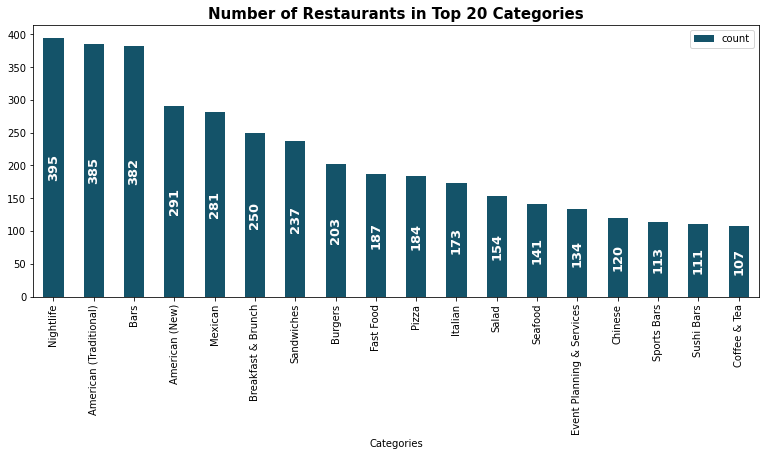

In [53]:
#Business Categories Plot 
list_string = bus['categories'].str.cat(sep=',')
list_split = list_string.split(',') #211050
list_split_all = [x.strip(' ') for x in list_split] # Take Spaces
count = Counter(list_split_all)
unique_list = list(count.keys())
most_frequent = count.most_common(20) #Change i to get i different categories
bus_cat_unique = pd.DataFrame(most_frequent,columns=['Categories','count'])
bus_cat_unique = bus_cat_unique[bus_cat_unique['Categories'] != 'Restaurants']
bus_cat_unique.reset_index(inplace=True,drop='index')
bus_cat_unique.sort_values('count',inplace=True,ascending=False)
bus_cat_unique.drop(index=bus_cat_unique.index[0], 
        axis=0, 
        inplace=True)
bus_cat_unique.reset_index(inplace=True,drop=True)

#Plot Categories
ax0 = bus_cat_unique.plot(kind='bar', y='count',x='Categories',figsize=(13,5),color='#145369')
for container in ax0.containers:
        ax0.bar_label(container, label_type='center',rotation=90,color='white',weight='bold',fontsize=13)
ax0.set_title('Number of Restaurants in Top 20 Categories', fontsize=15, fontweight='bold')
#plt.savefig('Number of Restaurants in Top 20 Categories.png',dpi=300,bbox_inches='tight')

In [54]:
bus.categories = bus.categories.str.replace(r"(","")
bus.categories = bus.categories.str.replace(r")","")
bus_cat_unique.Categories = bus_cat_unique.Categories.str.replace(r"(","")
bus_cat_unique.Categories = bus_cat_unique.Categories.str.replace(r")","")
cat_ch_df = pd.DataFrame(columns=['Categories','ch_freq'])
for i in range(len(bus_cat_unique)):
    cat_ch_df.loc[len(cat_ch_df),:] = [bus_cat_unique.iloc[i,0],bus[bus['categories'].str.contains(bus_cat_unique.iloc[i,0])]['ch_freq'].mean()]
cat_ch_df.ch_freq = cat_ch_df.ch_freq.astype(float)
cat_ch_df.ch_freq = round(cat_ch_df.ch_freq,3)

### Check-in Freq by Categories

Text(0.5, 1.0, 'Average Check-in Frequency by Categories')

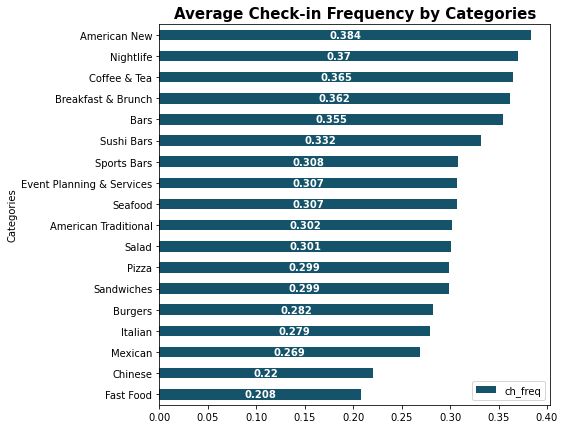

In [55]:
ax_cat = cat_ch_df.sort_values('ch_freq',ascending=True).plot(kind='barh',y='ch_freq',x='Categories',figsize=(7,7),color='#145369')
for container in ax_cat.containers:
        ax_cat.bar_label(container, label_type='center',color='white',weight='bold')
ax_cat.set_title('Average Check-in Frequency by Categories', fontsize=15, fontweight='bold')
#plt.savefig('Average Check-in Frequency by Categories.png',dpi=300,bbox_inches='tight')

### Check-in by Price Range

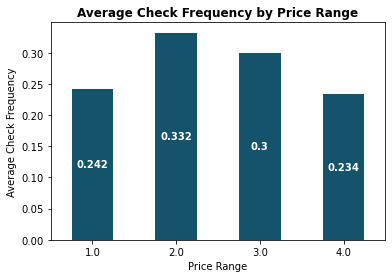

In [56]:
ax_c_pr = round(bus.groupby('RestaurantsPriceRange2')['ch_freq'].mean(),3).plot(kind='bar',rot=0,color='#145369')
for container in ax_c_pr.containers:
    ax_c_pr.bar_label(container, label_type='center',color='white',weight='bold')
ax_c_pr.set_xlabel('Price Range')
ax_c_pr.set_ylabel('Average Check Frequency')
ax_c_pr.set_title('Average Check Frequency by Price Range',weight='bold')
plt.savefig('Average Check Frequency by Price Range.png',dpi=300,bbox_inches='tight')

### Stars Plot

Text(0.5, 1.0, 'Number of Restaurants by Star Rating')

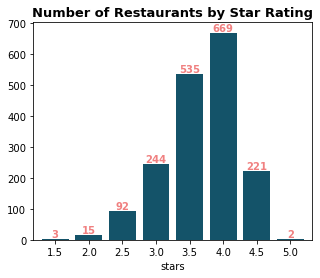

In [57]:
ax1 = bus.groupby('stars').size().plot(kind='bar',figsize=(5,4),color='#145369',rot=0,width=0.8)
for container in ax1.containers:
        ax1.bar_label(container, label_type='edge',color='lightcoral',weight='bold')
ax1.set_title('Number of Restaurants by Star Rating', fontsize=13, fontweight='bold')
#plt.savefig('Number of Restaurants by Star Rating.png',dpi=300,bbox_inches='tight')


### Check-ins by Day & Month

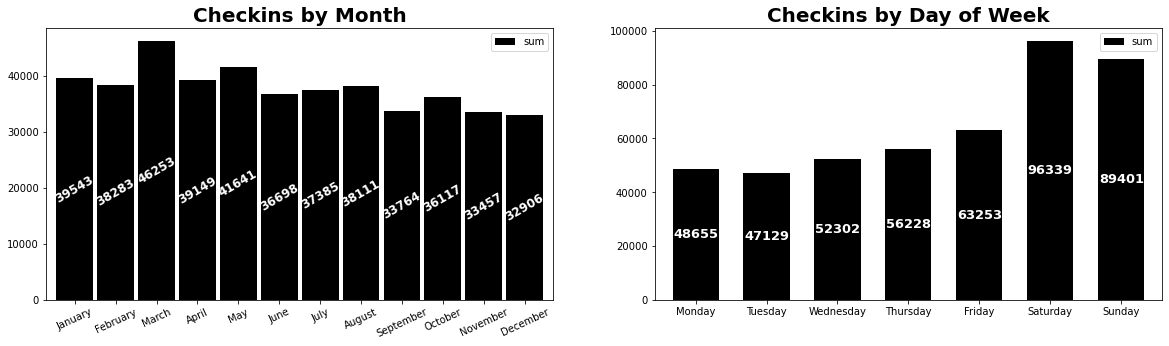

In [58]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
ch_byweekday = check_dates.groupby('WeekDay').sum()
ch_byweekday.reset_index(inplace=True)
#Create days of week as a list
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Make ch_byweekday a single level column
ch_byweekday.columns = ['WeekDay','sum']

ch_byweekday.set_index('WeekDay',inplace=True)
ch_byweekday['WeekDay'] = days
ch_byweekday = ch_byweekday.reindex(days)
ch_byweekday.drop('WeekDay',axis=1,inplace=True)
ch_byweekday.reset_index(inplace=True)

ax2 = ch_byweekday.plot(kind='bar',color='black',x='WeekDay',y='sum',rot=0,ax=axs[1],width=0.65)
for container in ax2.containers:
        ax2.bar_label(container, label_type='center',rotation=0,color='white',weight='bold',size=13)
ax2.set_title('Checkins by Day of Week', fontsize=20, fontweight='bold')
ax2.set(xlabel='')
#Create a list of the months
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
ch_bymonth = check_dates.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
ch_bymonth['date'] = months
ch_bymonth.rename(columns={'date':'Month','count':'sum'},inplace=True)
ax3 = ch_bymonth.plot(kind='bar',color='black',x='Month',y='sum',rot=25,width=0.9,ax=axs[0])
for container in ax3.containers:
        ax3.bar_label(container, label_type='center',rotation=30,color='white',weight='bold',size=12)
ax3.set_title('Checkins by Month', fontsize=20, fontweight='bold')
ax3.set(xlabel='')
plt.savefig('Checkins by Day of Week and Month_black.png',dpi=300,bbox_inches='tight')


### WordClouds for Tips & Reviews

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import _stop_words
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(_stop_words.ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(tips.loc[:,'tip'])
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)


full_text_rew = ' '.join(review_user.loc[:,'text'])
cloud_no_stopword2 = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text_rew)


fig, ax1 = plt.subplots(1,2, figsize=(20,5))
#Plot cloud_no_stopword and cloud_no_stopword2 in subplots
ax1[0].imshow(cloud_no_stopword, interpolation='bilinear')
ax1[0].axis('off')
ax1[0].set_title('Word Cloud of Tips', fontsize=20, fontweight='bold')
ax1[1].imshow(cloud_no_stopword2, interpolation='bilinear')
ax1[1].axis('off')
ax1[1].set_title('Word Cloud of Reviews', fontsize=20, fontweight='bold')
#plt.savefig('Word Cloud of Tips and Reviews.png',dpi=300,bbox_inches='tight')

In [61]:
from os import path
from PIL import Image
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "yelp_logo_cmyk_2.png")))
full_text_2 = full_text + full_text_rew
wc = WordCloud(max_words=1000, mask=mask, stopwords=my_stop_words).generate(full_text_2)
# store default colored image
#wc2 = WordCloud(max_words=1000, mask=mask, stopwords=my_stop_words).generate(full_text_rew)

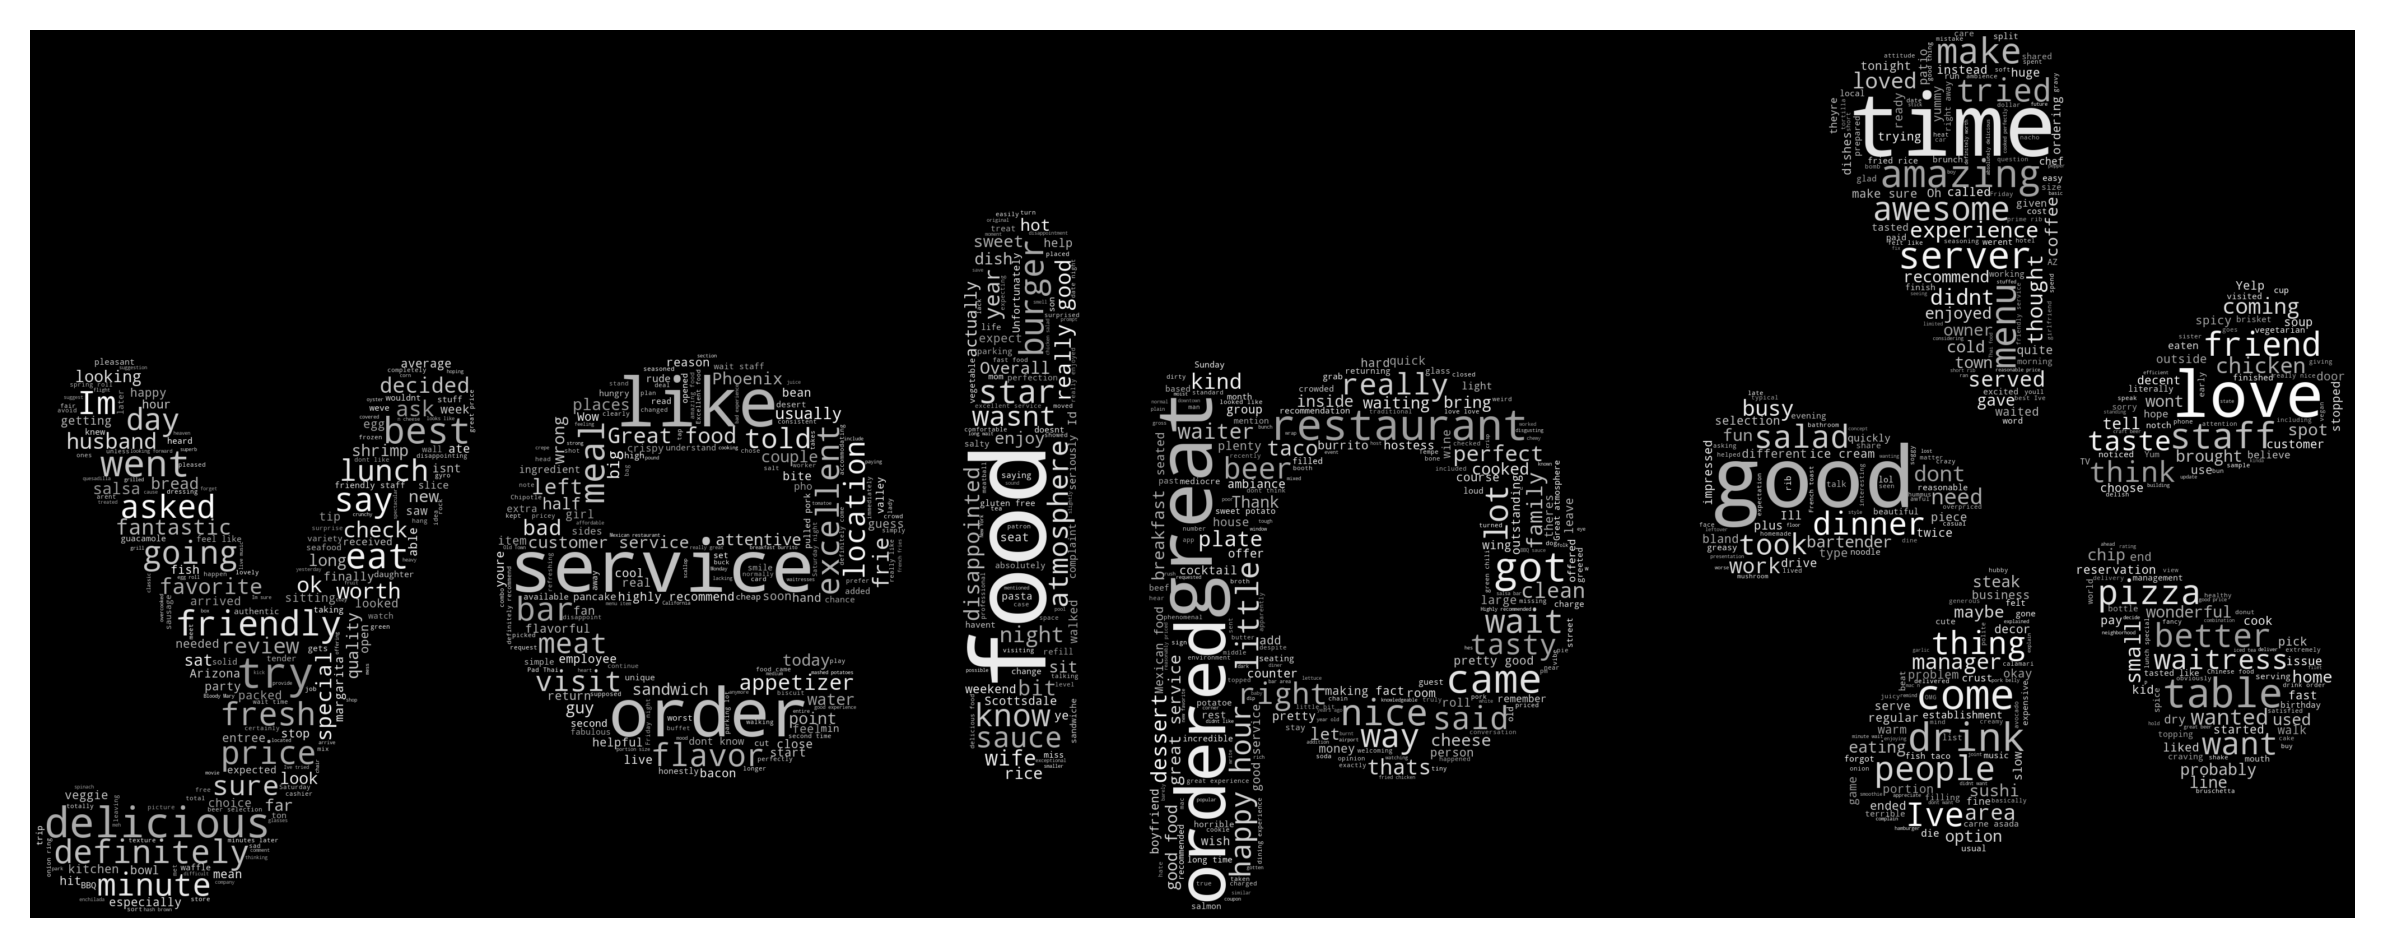

In [62]:
plt.figure(figsize=(10, 10),dpi=300)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
#wc.to_file("a_new_hope.png")
plt.axis("off")
#plt.savefig('Word Cloud of for Tips and Review_black.png',dpi=300,bbox_inches='tight')
plt.show()

### Sentiment Analysis Graphs for Tips & Reviews

Text(0.5, 1.0, 'Sentiment Score vs Stars for Reviews')

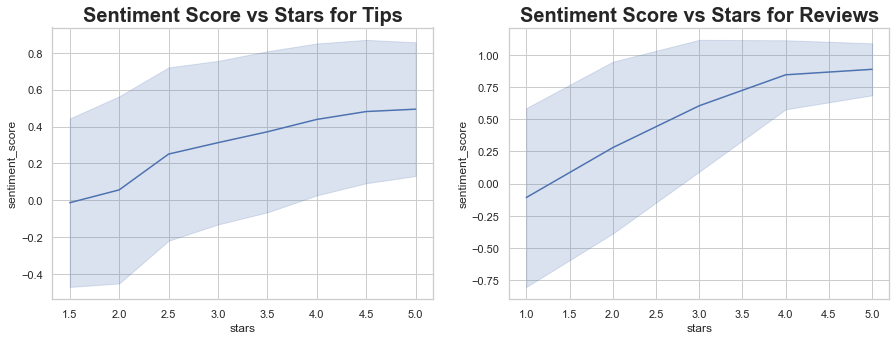

In [63]:
# Create lineplot for sentiment score and stars in tip_2015_NZ with variance, with standart deviation
sns.set(style='whitegrid')
fig, ax3 = plt.subplots(1,2, figsize=(15,5))
ax3_1 = sns.lineplot(x='stars', y='sentiment_score', data=tips ,err_style='band',ci='sd',ax=ax3[0])
ax3_1.set_title('Sentiment Score vs Stars for Tips', fontsize=20, fontweight='bold')

# Create lineplot for sentiment score and stars in review_user_2015_sent with variance, with standart deviation
ax3_2 = sns.lineplot(x='stars', y='sentiment_score', data=review_user,err_style='band',ci='sd',ax=ax3[1])
ax3_2.set_title('Sentiment Score vs Stars for Reviews', fontsize=20, fontweight='bold')
#plt.savefig('Sentiment Score vs Stars for Tips and Reviews.png',dpi=300,bbox_inches='tight')

#### AVG Sentiment by Check-in

Text(0.5, 1.0, 'Avg. Sentiment Score by Check-in Freq. for Reviews')

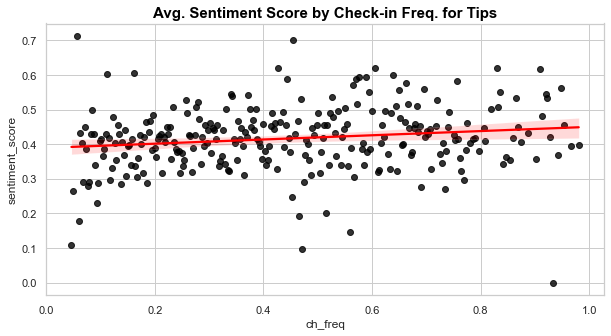

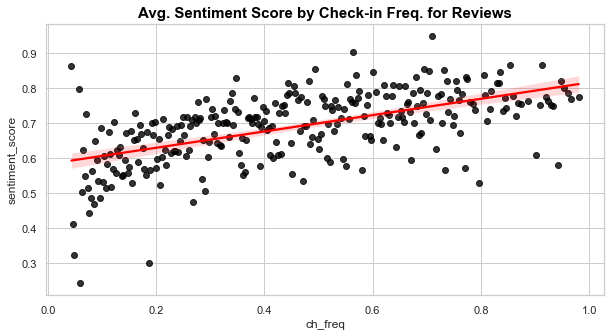

In [64]:
tips2 = tips.merge(ch_freq)
rew2 = review_user.merge(ch_freq)

#rew2.drop('rev_id',axis=1,inplace=True)
#rew2.drop_duplicates(inplace=True)
#rew2.reset_index(inplace=True,drop=True)

rew_2_df = rew2.groupby('ch_freq')['sentiment_score'].mean().reset_index()
tips_2_df = tips2.groupby('ch_freq')['sentiment_score'].mean().reset_index()
# Create lineplot for sentiment score and stars in tip_2015_NZ with variance, with standart deviation
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax3_1 = sns.regplot(x='ch_freq', y='sentiment_score',data=tips_2_df,scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax3_1.set_title('Avg. Sentiment Score by Check-in Freq. for Tips', fontsize=15, fontweight='bold',color='black')
#plt.show()
plt.savefig('Avg. Sentiment Score by Check-in for Tips.png',dpi=300,bbox_inches='tight')
# Create lineplot for sentiment score and stars in review_user_2015_sent with variance, with standart deviation
plt.figure(figsize=(10,5))
ax3_2 = sns.regplot(x='ch_freq', y='sentiment_score',data=rew_2_df,scatter_kws={"color": "black"}, line_kws={"color": "red"})
ax3_2.set_title('Avg. Sentiment Score by Check-in Freq. for Reviews', fontsize=15, fontweight='bold',color='black')
#plt.show()
#plt.savefig('Avg. Sentiment Score by Check-in for Reviews.png',dpi=300,bbox_inches='tight')

### Rev_AVG

Text(0.5, 1.0, 'Correlation Matrix of AVG Reviews')

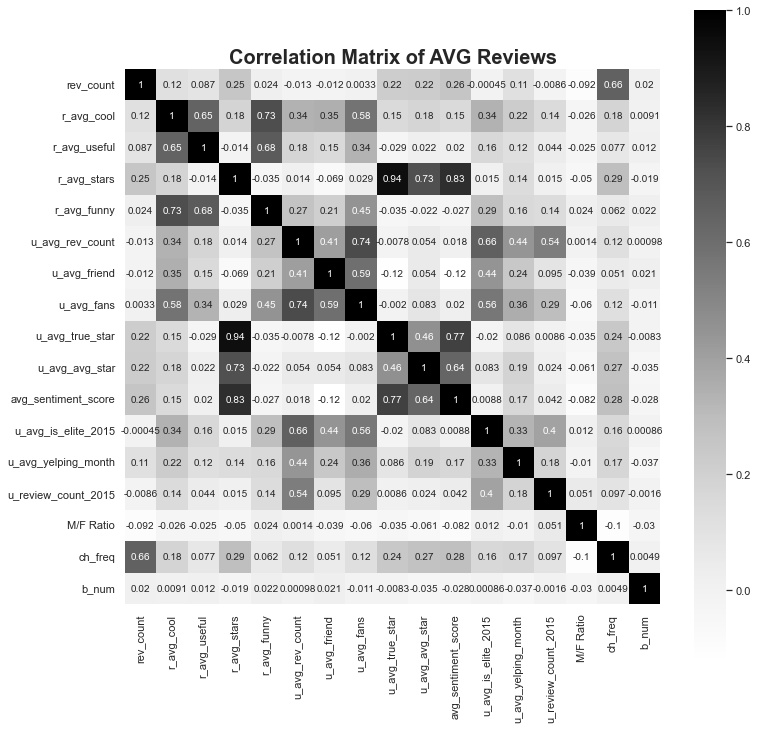

In [65]:
review_avg = review_avg.merge(b_id_NZ_df_5, on=['business_id','b_num'], how='inner')
plt.figure(figsize=(12,12))
ax_avg = sns.heatmap(review_avg.corr(), annot=True, cmap='Greys',square=True, linecolor='white',annot_kws={"size": 10})
ax_avg.set_title('Correlation Matrix of AVG Reviews', fontsize=20, fontweight='bold')
#plt.savefig('Correlation Matrix of AVG Reviews.png',dpi=300,bbox_inches='tight')

#### Rev_Avg to Latex

In [66]:
print(round(review_avg.iloc[:,:-2].describe().T.iloc[:,[0,1,2,3,7]],3).to_latex().replace("\\\n", "\\ \hline\n"))

\begin{tabular}{lrrrrr}
\toprule
{} &   count &    mean &      std &    min &       max \\ \hline
\midrule
rev\_count           &  1781.0 &  61.238 &   73.544 &  1.000 &   763.000 \\ \hline
r\_avg\_cool          &  1781.0 &   0.407 &    0.393 &  0.000 &     3.429 \\ \hline
r\_avg\_useful        &  1781.0 &   0.891 &    0.683 &  0.000 &    10.864 \\ \hline
r\_avg\_stars         &  1781.0 &   3.688 &    0.643 &  1.000 &     5.000 \\ \hline
r\_avg\_funny         &  1781.0 &   0.371 &    0.343 &  0.000 &     4.087 \\ \hline
u\_avg\_rev\_count     &  1781.0 &  87.833 &   58.350 &  7.500 &   744.583 \\ \hline
u\_avg\_friend        &  1781.0 &  91.651 &  151.058 &  0.000 &  5828.000 \\ \hline
u\_avg\_fans          &  1781.0 &   7.329 &    9.567 &  0.000 &   173.000 \\ \hline
u\_avg\_true\_star     &  1781.0 &  -0.047 &    0.498 & -2.810 &     1.123 \\ \hline
u\_avg\_avg\_star      &  1781.0 &   3.736 &    0.237 &  2.178 &     4.420 \\ \hline
avg\_sentiment\_score &  1781.0 &   0.629 &    0.20

### Income and Check-freq by ZipCode

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='zip', ylabel='pc_income'>

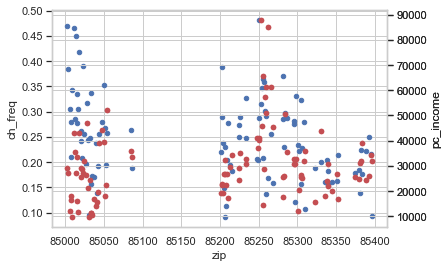

In [67]:
ax0 = bus[['zip','pc_income','ch_freq']].groupby('zip').mean().reset_index().plot(kind='scatter',x='zip',y='ch_freq')
ax1 = ax0.twinx()
bus[['zip','pc_income','ch_freq']].groupby('zip').mean().reset_index().plot(kind='scatter',x='zip',
y='pc_income',ax=ax1,color='r',)
ax1 = ax0.twinx()
bus[['zip','pc_income','ch_freq']].groupby('zip').mean().reset_index().plot(kind='scatter',x='zip',
y='pc_income',ax=ax1,color='r',)

### Income Distribution Plot

Text(0.5, 1.0, 'Income Distribution')

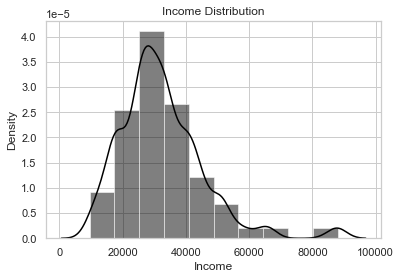

In [68]:
#ax_h = plt.hist(bus.pc_income)
#Add Title and Labels
#Add Density Plot
ax_d = sns.distplot(bus.pc_income, bins=10, kde=True, color='black', hist_kws={'alpha':0.5})
ax_d.set_xlabel('Income')
ax_d.set_ylabel('Density')
ax_d.set_title('Income Distribution')
#plt.savefig('Income_Dist.png',dpi=300,bbox_inches='tight')

### Reviews by Gender

Text(0.5, 1.0, 'Number of Reviews by Gender')

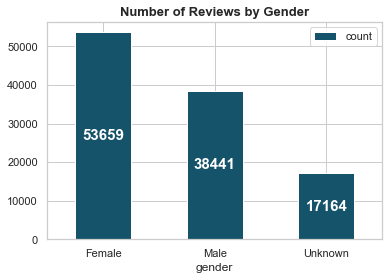

In [69]:
review_user.gender.replace(np.NaN,'Unknown',inplace=True)
ax_g = review_user.groupby('gender').size().to_frame().reset_index().rename(columns={0:'count'}).plot(kind='bar',rot=0,x='gender',color='#145369')
for container in ax_g.containers:
    ax_g.bar_label(container,color='white',label_type='center',size=15,weight='bold')
ax_g.set_xticklabels(['Female','Male','Unknown'])
ax_g.set_title('Number of Reviews by Gender',size=13,weight='bold')
#plt.savefig('Number of Reviews by Gender',dpi=300,bbox_inches='tight')

### HeatMap of Resturants Location

In [ ]:
locations = bus[['latitude', 'longitude']]
gmaps.configure(api_key='*')

figure_layout = {
    'width': '500px',
    'height': '400px',}
figx = gmaps.figure()
figx.add_layer(gmaps.heatmap_layer(locations))
figx
#plt.savefig('Heatmap of Business Locations.png',dpi=300,bbox_inches='tight')

### Income & Dist & Check Plots

<AxesSubplot:xlabel='haversine_dist', ylabel='ch_freq'>

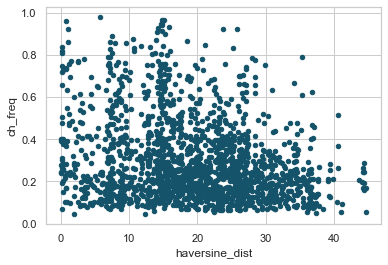

In [70]:
#Dist and Check Freq
bus.plot(kind='scatter',x='haversine_dist',y='ch_freq',color='#145369')

## Attributes Check

### Null Count and Plot Attributes

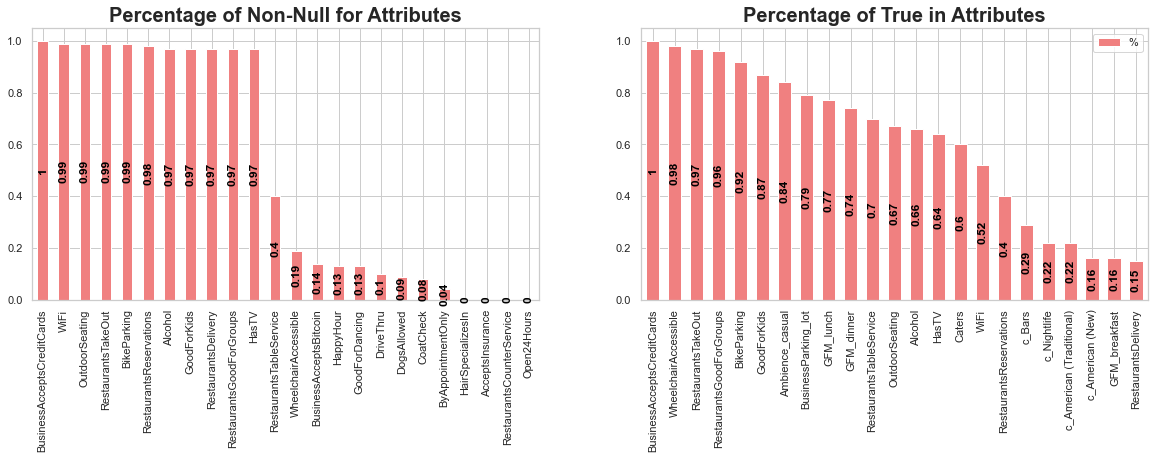

In [71]:
# Attributes List
att_list1 = ['WiFi', 'HasTV',
       'Alcohol', 'GoodForKids', 'OutdoorSeating', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'BusinessAcceptsCreditCards', 'Caters', 'BikeParking',
       'RestaurantsTableService',  'DriveThru', 'WheelchairAccessible',
       'BusinessAcceptsBitcoin',   'CoatCheck',
       'HappyHour', 'BestNights', 'DogsAllowed', 'GoodForDancing', 
        'ByAppointmentOnly', 'DietaryRestrictions', 
       'AgesAllowed', 'HairSpecializesIn', 'AcceptsInsurance',
       'RestaurantsCounterService', 'Open24Hours', 
        'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'GFM_dessert', 'GFM_latenight',
       'GFM_lunch', 'GFM_dinner', 'GFM_brunch', 'GFM_breakfast', 'c_Nightlife',
       'c_American (Traditional)', 'c_Bars', 'c_American (New)', 'c_Mexican',
       'c_Breakfast & Brunch', 'c_Sandwiches', 'c_Burgers', 'c_Fast Food',
       'c_Pizza', 'c_Italian', 'c_Salad', 'c_Seafood',
       'c_Event Planning & Services', 'c_Chinese', 'c_Sports Bars',
       'c_Sushi Bars', 'c_Coffee & Tea']

att_list2 = ['WiFi', 'HasTV',
       'Alcohol', 'GoodForKids', 'OutdoorSeating', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsTableService',  'DriveThru', 'WheelchairAccessible',
       'BusinessAcceptsBitcoin',  'CoatCheck',
       'HappyHour', 'DogsAllowed', 'GoodForDancing',
        'ByAppointmentOnly', 
       'HairSpecializesIn', 'AcceptsInsurance',
       'RestaurantsCounterService', 'Open24Hours']

# Null Counter
bus.replace({'1':1, '0':0}, inplace=True)
b_null_count = pd.isnull(bus[att_list2])

b_null_count
# If isnull = False, value is 1, otherwise 0
b_null_count.replace({False: 1, True: 0},inplace=True)
b_null_count = b_null_count.append((b_null_count.sum()/len(b_null_count)).rename('Data_Percentage'))

fig, axat = plt.subplots(1,2, figsize=(20,5))
ax_b = round(b_null_count.iloc[-1,:],2).sort_values(ascending=False).plot(kind='bar',
rot=90,color=['lightcoral'],ax=axat[0])
for container in ax_b.containers:
    ax_b.bar_label(container,color='black',label_type='center',weight='bold',rotation=90)
ax_b.set_title('Percentage of Non-Null for Attributes', fontsize=20, fontweight='bold')


# Number of True

attributes_check = bus[att_list1]
attributes_check.replace({False:0,True:1,'False':0,'True':1},inplace=True)

#ax_at = attributes_check.sum(axis=0).sort_values(ascending=False)[0:20].plot(kind='bar',
#rot=90,color=['lightcoral'],ax=axat[1])
#for container in ax_at.containers:
#    ax_at.bar_label(container,color='black',label_type='center',weight='bold',rotation=90)
#ax_at.set_title('Number of True for Attributes', fontsize=20, fontweight='bold')



#Attribute True %

b_null_df = b_null_count.iloc[-1,:].sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'attribute'})
b_null_df = b_null_df[b_null_df.Data_Percentage > 0.2]
att_list = b_null_df.attribute.tolist()

att_list.extend(attributes_check.sum(axis=0).sort_values(ascending=False)[0:20].reset_index()['index'].tolist())
att_list = set(att_list)



att_count = pd.DataFrame()
for x,y in enumerate(att_list):
    new_df = pd.DataFrame(bus.loc[:,y].value_counts())
    att_count = pd.concat([att_count,new_df],axis=1)
att_count.reset_index(inplace=True)
att_count.loc[3,:] = ""
for i in range(1,24):
    att_count.iloc[3,i] = att_count.iloc[1,i] / np.sum(att_count.iloc[:2,i])


att_df = att_count.iloc[3,1:].sort_values(ascending=False).reset_index().rename(columns={'index':'attribute',3:'%'})
att_df['%'] = att_df['%'].astype(float)
att_df['%'] = round(att_df['%'],2)

ax_att = att_df.plot(kind='bar',x='attribute',y='%',color=['lightcoral'],width=0.6,ax=axat[1],xlabel="")
for container in ax_att.containers:
    ax_att.bar_label(container,color='black',label_type='center',weight='bold',rotation=90)
ax_att.set_title('Percentage of True in Attributes', fontsize=20, fontweight='bold')
plt.savefig('Per. of Non-Null & True Att.',dpi=300,bbox_inches='tight')
#plt.savefig('Attribute_True_%.png',dpi=300,bbox_inches='tight')

#Select first 20 Attributes
selected_att = att_df.iloc[:20,0].tolist()
#Add From Percentage of Non-Null
selected_att.extend(att_list)
#Add From Number of True
selected_att.extend(attributes_check.sum(axis=0).sort_values(ascending=False)[0:20].reset_index()['index'].tolist())
selected_att.append('RestaurantsPriceRange2')
selected_att.append('is_chain')
selected_att = set(selected_att)

### Show Selected Attributes

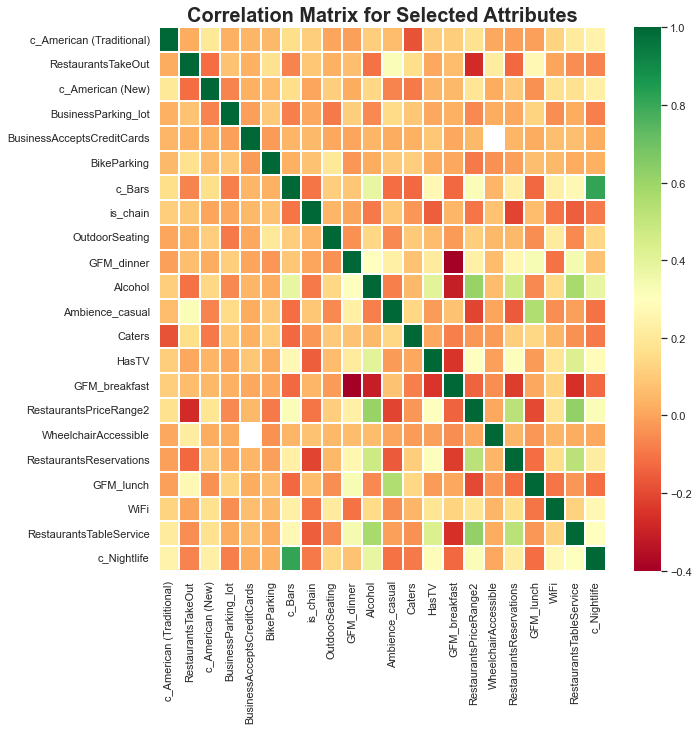

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(round(bus[selected_att].corr(),2),cmap='RdYlGn',linewidths=0.2,square=False)
plt.title('Correlation Matrix for Selected Attributes', fontsize=20, fontweight='bold')
plt.show()

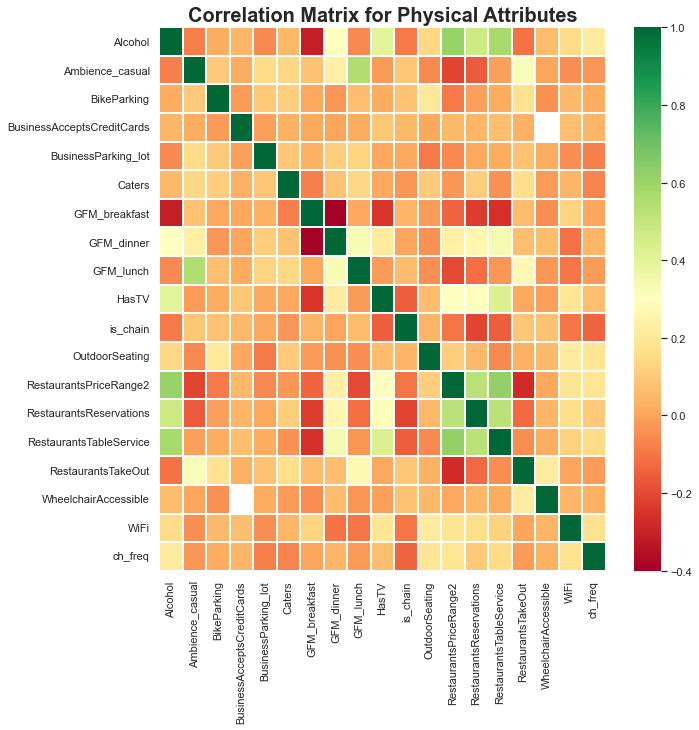

In [73]:
selected_phy_att = ['Alcohol',
 'Ambience_casual',
 'BikeParking',
 'BusinessAcceptsCreditCards',
 'BusinessParking_lot',
 'Caters',
 'GFM_breakfast',
 'GFM_dinner',
 'GFM_lunch',
 'GoodForKids',
 'HasTV',
 'is_chain',
 'OutdoorSeating',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'WheelchairAccessible',
 'WiFi',
 'ch_freq']

plt.figure(figsize=(10,10))
sns.heatmap(round(bus[selected_phy_att].corr(),2),cmap='RdYlGn',linewidths=0.2,square=False)
plt.title('Correlation Matrix for Physical Attributes', fontsize=20, fontweight='bold')
plt.savefig('Correlation Matrix for Physical Attributes.png', dpi=300, bbox_inches='tight')
plt.show()

### Latex for Physical Attributes

In [74]:
print(round(bus[selected_phy_att].describe(),3).T.iloc[:,[0,1,2,3,7]].to_latex().replace("\\\n", "\\ \hline\n"))

\begin{tabular}{lrrrrr}
\toprule
{} &   count &   mean &    std &    min &    max \\ \hline
\midrule
Alcohol                    &  1736.0 &  0.662 &  0.473 &  0.000 &  1.000 \\ \hline
Ambience\_casual            &  1781.0 &  0.836 &  0.370 &  0.000 &  1.000 \\ \hline
BikeParking                &  1772.0 &  0.920 &  0.272 &  0.000 &  1.000 \\ \hline
BusinessAcceptsCreditCards &  1780.0 &  0.996 &  0.067 &  0.000 &  1.000 \\ \hline
BusinessParking\_lot        &  1781.0 &  0.787 &  0.410 &  0.000 &  1.000 \\ \hline
Caters                     &  1749.0 &  0.600 &  0.490 &  0.000 &  1.000 \\ \hline
GFM\_breakfast              &  1781.0 &  0.158 &  0.365 &  0.000 &  1.000 \\ \hline
GFM\_dinner                 &  1781.0 &  0.736 &  0.441 &  0.000 &  1.000 \\ \hline
GFM\_lunch                  &  1781.0 &  0.765 &  0.424 &  0.000 &  1.000 \\ \hline
HasTV                      &  1728.0 &  0.643 &  0.479 &  0.000 &  1.000 \\ \hline
is\_chain                   &  1781.0 &  0.385 &  0.487 &  0.000

## Create Numerical Analysis DataFrame

In [75]:
desc_attributes = [ 'stars', 'is_chain', 'b_num', 'haversine_dist', 'pc_income', 'population']
desc_attributes.extend(selected_att)

bus_desc = bus[desc_attributes]
bus_desc.replace({False:0,True:1},inplace=True)

bus_desc = bus_desc.merge(review_avg,on='b_num')
bus_desc = round(bus_desc,3)
bus_desc

,stars,is_chain,b_num,haversine_dist,pc_income,population,c_American (Traditional),RestaurantsTakeOut,c_American (New),RestaurantsDelivery,...,u_avg_friend,u_avg_fans,u_avg_true_star,u_avg_avg_star,avg_sentiment_score,u_avg_is_elite_2015,u_avg_yelping_month,u_review_count_2015,M/F Ratio,ch_freq
0,2.5,1.0,2173,28.731,41054.0,30253.0,0.0,1.0,0.0,0,...,21.857,0.429,-2.279,3.421,0.139,0.000,32.143,2.286,1.000,0.216
1,3.0,1.0,118,16.422,25744.0,51930.0,0.0,1.0,0.0,0,...,57.250,1.500,0.597,4.402,0.773,0.250,46.000,4.500,2.000,0.088
2,4.0,1.0,1855,26.245,26350.0,36244.0,0.0,1.0,0.0,0,...,2.667,0.667,-0.347,2.680,0.014,0.000,8.000,5.667,2.000,0.063
3,3.0,1.0,568,8.896,19688.0,41677.0,0.0,1.0,0.0,0,...,110.000,0.500,-0.925,3.925,0.790,0.000,12.500,3.000,0.000,0.068
4,2.5,1.0,2233,38.343,25628.0,46507.0,0.0,1.0,0.0,0,...,1.000,0.667,-2.357,3.357,-0.746,0.000,35.667,4.333,0.000,0.068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,3.5,0.0,1971,36.176,34176.0,15594.0,0.0,1.0,0.0,0,...,81.348,1.217,0.280,3.981,0.778,0.000,21.739,3.565,0.333,0.178
1777,3.5,0.0,50,12.765,17556.0,57507.0,0.0,1.0,0.0,0,...,61.586,4.276,0.590,3.686,0.836,0.069,39.448,3.690,1.400,0.162
1778,4.0,0.0,1332,28.689,34095.0,25000.0,0.0,1.0,1.0,0,...,32.544,2.772,0.424,3.822,0.883,0.035,24.018,3.316,0.958,0.249
1779,4.5,0.0,777,18.422,25789.0,37172.0,0.0,1.0,0.0,0,...,61.009,2.028,0.414,3.982,0.713,0.019,26.443,3.651,0.755,0.866


# C - Prediction

## Fix Files before Prediction

### Weather Data

In [ ]:
# Get Weather Data

# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(2015, 2, 2)
end = datetime(2015, 4, 1)
weather_data = pd.DataFrame()

for i in range(len(bus)):
    loc = Point(bus.iloc[i,6],bus.iloc[i,7])
    # Get Daily data
    w_data = Daily(loc, start, end)
    w_data = w_data.fetch()
    w_data.reset_index(inplace=True)
    w_data['b_num'] = bus.loc[i,'b_num']
    weather_data = weather_data.append(w_data)
    weather_data.reset_index(drop=True,inplace=True)

weather_data.rename(columns={'time':'date'},inplace=True)
weather_data_full = weather_data.copy()
#weather_data_full.to_csv('weather_data_full.csv')

In [76]:
weather_data_full = pd.read_csv('weather_data_full.csv')
weather_data_full.drop(['Unnamed: 0'],axis=1,inplace=True)
"""
weather_data_full.date  = weather_data_full.date.apply(lambda x: pd.to_datetime(x))
weather_data_full.date =  weather_data_full.date.apply(lambda x: datetime.date(x))
"""
weather_data_full.date = pd.to_datetime(weather_data_full.date)
weather_data_full.sample(10)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,b_num,station
331353,2015-09-17,31.1,24.4,36.7,0.0,NaN,NaN,7.6,NaN,1008.5,NaN,2092,NaN
588828,2015-11-01,19.6,11.4,27.8,0.0,NaN,NaN,5.8,NaN,1015.5,NaN,52,NaN
238140,2015-06-25,35.9,30.0,41.7,0.0,NaN,NaN,10.0,NaN,1007.6,NaN,2165,NaN
396761,2015-12-15,6.1,1.7,11.7,0.0,NaN,NaN,6.5,NaN,1014.2,NaN,1455,NaN
280652,2015-04-10,20.7,12.2,27.8,0.0,NaN,NaN,2.2,NaN,1011.5,NaN,1753,NaN
631441,2015-10-14,27.5,20.0,36.0,0.0,NaN,NaN,0.5,NaN,1011.3,NaN,2151,NaN
448693,2015-11-14,18.4,11.1,25.6,0.0,NaN,NaN,6.1,NaN,1013.0,NaN,2222,NaN
120416,2015-04-01,24.5,19.4,29.4,0.0,NaN,208.0,10.8,NaN,1008.3,NaN,1642,NaN
309598,2015-04-18,22.1,12.2,30.6,0.0,NaN,NaN,9.4,NaN,1010.8,NaN,131,NaN
442393,2015-08-26,32.4,28.9,41.1,0.0,NaN,102.0,10.8,NaN,1011.5,NaN,316,NaN


#### Drop Businesses without Weather Data

In [77]:
weather_data_full.iloc[:,[1,4]].describe()

,tavg,prcp
count,649899.000000,644572.000000
mean,24.151001,0.476732
std,8.608273,2.071452
min,2.000000,0.000000
25%,17.100000,0.000000
50%,24.200000,0.000000
75%,32.300000,0.000000
max,39.700000,23.600000


In [78]:
b_num_no_weather = np.setdiff1d(bus['b_num'].unique(), weather_data_full['b_num'].unique()).tolist()
b_num_no_weather
#No Weather Data for 9 Businesses, Drop Them
#bus.drop(bus[bus['b_num'].isin(b_num_no_weather)].index,inplace=True)
#bus.reset_index(drop=True,inplace=True)

[]

##### Create b_id_NZ_df_5

In [79]:
#Number of Unique Businesses dropped to 1790, so save them as b_id_NZ_df_4.csv

#Add Unique values of business_id in review_nz_2015 to a new dataframe
b_id_nz_5_df = pd.DataFrame(list(bus['b_num'].unique()))
b_id_nz_5_df.rename(columns={0:'b_num'},inplace=True)

b_id_nz_5_df = b_id_nz_5_df.merge(bus[['business_id','b_num']],on='b_num',how='left')
#Drop Duplicates
b_id_nz_5_df.drop_duplicates(inplace=True)
b_id_nz_5_df.reset_index(drop=True,inplace=True)
#b_id_nz_5_df.to_csv('b_id_NZ_df_5.csv',index=False)

### Bus Pred

In [80]:
bus_pred = bus_desc.copy()
bus_pred.drop('business_id',inplace=True,axis=1)
bus_pred.replace({np.NaN:0,'None':0},inplace=True)
bus_pred = bus_pred.merge(b_id_nz_5_df,on='b_num',how='right')
bus_pred

,stars,is_chain,b_num,haversine_dist,pc_income,population,c_American (Traditional),RestaurantsTakeOut,c_American (New),RestaurantsDelivery,...,u_avg_fans,u_avg_true_star,u_avg_avg_star,avg_sentiment_score,u_avg_is_elite_2015,u_avg_yelping_month,u_review_count_2015,M/F Ratio,ch_freq,business_id
0,2.5,1.0,2173,28.731,41054.0,30253.0,0.0,1.0,0.0,0,...,0.429,-2.279,3.421,0.139,0.000,32.143,2.286,1.000,0.216,xDHuJaOQ5HqaLP0zgpJD9w
1,3.0,1.0,118,16.422,25744.0,51930.0,0.0,1.0,0.0,0,...,1.500,0.597,4.402,0.773,0.250,46.000,4.500,2.000,0.088,1pytOeO_PhT4EVpk2MXQBA
2,4.0,1.0,1855,26.245,26350.0,36244.0,0.0,1.0,0.0,0,...,0.667,-0.347,2.680,0.014,0.000,8.000,5.667,2.000,0.063,okX1jSK4-4uPdglVFNYhSw
3,3.0,1.0,568,8.896,19688.0,41677.0,0.0,1.0,0.0,0,...,0.500,-0.925,3.925,0.790,0.000,12.500,3.000,0.000,0.068,EYWaN9sLjVYdi7fKIRguVA
4,2.5,1.0,2233,38.343,25628.0,46507.0,0.0,1.0,0.0,0,...,0.667,-2.357,3.357,-0.746,0.000,35.667,4.333,0.000,0.068,z38AL1If2XDQhxh3Ioan3A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,3.5,0.0,1971,36.176,34176.0,15594.0,0.0,1.0,0.0,0,...,1.217,0.280,3.981,0.778,0.000,21.739,3.565,0.333,0.178,s3AG8m6Pzq-vON729pf0gw
1777,3.5,0.0,50,12.765,17556.0,57507.0,0.0,1.0,0.0,0,...,4.276,0.590,3.686,0.836,0.069,39.448,3.690,1.400,0.162,-tcJmqzfaeEnpFMAelB7bA
1778,4.0,0.0,1332,28.689,34095.0,25000.0,0.0,1.0,1.0,0,...,2.772,0.424,3.822,0.883,0.035,24.018,3.316,0.958,0.249,_VIIuz9CAt68Hb54hQmpXA
1779,4.5,0.0,777,18.422,25789.0,37172.0,0.0,1.0,0.0,0,...,2.028,0.414,3.982,0.713,0.019,26.443,3.651,0.755,0.866,KOEBBp2PhiV_4PkW9eo9Sg


## Frac Part

- This part used on sample analysis

### Create 30 Random Date, 25% of Businesses

In [ ]:
#Create a datelist

datelist_random = pd.date_range(start=np.datetime64('2015-01-01'), end= np.datetime64('2015-12-31'),freq='D').to_list()
random_datelist = datelist_random
random_datelist.sort()
for i in range(len(random_datelist)):
    random_datelist[i] = datetime.date(random_datelist[i])

#Get 25% of Businesses
bus_frac = bus_pred.sample(frac=1)
bus_frac= bus_frac.sort_values('b_num')
bus_frac.reset_index(drop=True,inplace=True)

date_df = pd.DataFrame(random_datelist)
date_df.rename(columns={0:'date'},inplace=True)
date_df = date_df.iloc[np.repeat(np.arange(len(date_df)), len(bus_frac))]
date_df['date'] = pd.to_datetime(date_df['date']).dt.normalize()
date_df.sort_values('date',ascending=True).reset_index(drop=True,inplace=True)

#Crete Data File
data_col2 = ['date','b_num']
data = pd.DataFrame(columns=data_col2)

data['b_num'] = bus_frac['b_num']

data1 = data.copy()
for i in range(len(random_datelist)-1):
    data = data.append(data1)

data.reset_index(drop=True, inplace=True)
date_df.reset_index(drop=True,inplace=True)
data['date'] = date_df['date']
data['date'] = pd.to_datetime(data['date']).dt.normalize()

data = data.sort_values(['date','b_num'])
data.reset_index(drop=True,inplace=True)
data = pd.merge(data,bus_frac,on='b_num',how='left')

#Add Weather
data = pd.merge(data,weather_data_full[['b_num','date','tavg','prcp']], on=['b_num','date'],how='left').sort_values(['b_num','date'])
data.reset_index(drop=True,inplace=True)

### Review

In [ ]:
review_daily = pd.read_csv('review_daily.csv')

review_daily_col = review_daily.columns.tolist()
for i in range(1, len(review_daily.columns)):
    review_daily_col[i] = pd.to_datetime(review_daily_col[i])
    review_daily_col[i] = datetime.date(review_daily_col[i])
review_daily.columns = review_daily_col

review_daily = review_daily.merge(b_id_nz_5_df,on='business_id',how='right')

review_daily.sort_values(['b_num'],inplace=True,ignore_index=True)

#Frac
review_daily_frac = review_daily[review_daily.b_num.isin(bus_frac.b_num.unique().tolist())]
review_daily_frac.reset_index(drop=True,inplace=True)

first_line = np.arange(len(data))
# 0 to 13350
second_line = np.repeat(np.arange(0,len(bus_frac)), len(random_datelist))
# 0 to 445, each 30 times
third_line = np.tile(random_datelist, len(bus_frac))
data['review'] = ""
for x,y,z in zip(first_line,second_line,third_line):
    data.iloc[x,-1] = review_daily_frac.loc[y,z]

data.review.replace(np.NaN,0,inplace=True)

for i in range(len(data)):
    if data.loc[i,'review'] > 0:
        data.loc[i,'review'] = 1

### Tips

In [ ]:
tip_daily = pd.read_csv('tip_daily.csv')

tip_daily_col = tip_daily.columns.tolist()
for i in range(1, len(tip_daily.columns)):
    tip_daily_col[i] = pd.to_datetime(tip_daily_col[i])
    tip_daily_col[i] = datetime.date(tip_daily_col[i])
tip_daily.columns = tip_daily_col

tip_daily = tip_daily.merge(b_id_nz_5_df,on='business_id',how='right')

tip_daily.sort_values(['b_num'],inplace=True,ignore_index=True)

#Frac
tip_daily_frac = tip_daily[tip_daily.b_num.isin(bus_frac.b_num.unique().tolist())]
tip_daily_frac.reset_index(drop=True,inplace=True)

first_line = np.arange(len(data))
# 0 to 13350
second_line = np.repeat(np.arange(0,len(bus_frac)), len(random_datelist))
# 0 to 445, each 30 times
third_line = np.tile(random_datelist, len(bus_frac))
data['tips'] = ""
for x,y,z in zip(first_line,second_line,third_line):
    data.iloc[x,-1] = tip_daily_frac.loc[y,z]


data.tips.replace(np.NaN,0,inplace=True)

for i in range(len(data)):
    if data.loc[i,'tips'] > 0:
        data.loc[i,'tips'] = 1


### Check-in

In [ ]:
check_t_2015 = pd.read_csv('check_t_2015.csv')
check_tt = check_t_2015.T
check_tt.iloc[0,:] = pd.to_datetime(check_tt.iloc[0,:])
for i in range(0,len(check_tt.columns)):
    check_tt.iloc[0,i] = check_tt.iloc[0,i].date()
check_tt.columns += 1

check_tt.reset_index(inplace=True)
check_tt.rename(columns={'index':'business_id'},inplace=True)

check_tt.columns = check_tt.iloc[0,:]
check_tt = check_tt[1:]
check_tt.rename(columns={'Date':'business_id'},inplace=True)

check_tt = check_tt.merge(b_id_nz_5_df,on='business_id',how='right')
check_tt.drop('business_id',inplace=True,axis=1)
check_tt.sort_values(['b_num'],inplace=True,ignore_index=True)

check_tt_frac = check_tt[check_tt.b_num.isin(bus_frac.b_num.unique().tolist())]
check_tt_frac.reset_index(drop=True,inplace=True)


###

first_line = np.arange(len(data))
# 0 to 13350
second_line = np.repeat(np.arange(0,len(bus_frac)), len(random_datelist))
# 0 to 445, each 30 times
third_line = np.tile(random_datelist, len(bus_frac))
data['check'] = ""
for x,y,z in zip(first_line,second_line,third_line):
    data.iloc[x,-1] = check_tt_frac.loc[y,z]
    
data.check.replace(np.NaN,0,inplace=True)

for i in range(len(data)):
    if data.loc[i,'check'] > 0:
        data.loc[i,'check'] = 1

## Full Part

### Create Full Data

In [83]:
#Create a datelist

random_datelist = pd.date_range(start=np.datetime64('2015-01-01'), end= np.datetime64('2015-12-31'),freq='D').to_list()
random_datelist.sort()
for i in range(len(random_datelist)):
    random_datelist[i] = datetime.date(random_datelist[i])


bus_frac = bus_pred
bus_frac= bus_frac.sort_values('b_num')
bus_frac.reset_index(drop=True,inplace=True)

date_df = pd.DataFrame(random_datelist)
date_df.rename(columns={0:'date'},inplace=True)
date_df = date_df.iloc[np.repeat(np.arange(len(date_df)), len(bus_frac))]
date_df['date'] = pd.to_datetime(date_df['date']).dt.normalize()
date_df.sort_values('date',ascending=True)
date_df.reset_index(drop=True,inplace=True)




#Crete Data File


data_1 = pd.DataFrame(np.tile(bus_frac['b_num'], len(random_datelist)))
data_1.rename(columns={0:'b_num'},inplace=True)

data = pd.DataFrame(columns=['date','b_num'])
data['b_num'] = data_1['b_num']
data['date'] = date_df['date']

data['date'] = pd.to_datetime(data['date']).dt.normalize()

data = data.sort_values(['date','b_num'])
data.reset_index(drop=True,inplace=True)
data = pd.merge(data,bus_frac,on='b_num',how='left')

#Add Weather
data = pd.merge(data,weather_data_full[['b_num','date','tavg','prcp']], on=['b_num','date'],how='left').sort_values(['b_num','date'])
data.reset_index(drop=True,inplace=True)

### Add Daily Review, Tips, Checkin

In [ ]:
review_daily = pd.read_csv('review_daily.csv')

review_daily_col = review_daily.columns.tolist()
for i in range(1, len(review_daily.columns)):
    review_daily_col[i] = pd.to_datetime(review_daily_col[i])
    review_daily_col[i] = datetime.date(review_daily_col[i])
review_daily.columns = review_daily_col

review_daily = review_daily.merge(b_id_nz_5_df,on='business_id',how='right')

review_daily.sort_values(['b_num'],inplace=True,ignore_index=True)

review_daily.drop(['business_id','b_num'],inplace=True,axis=1)

review_list = []
for i in range(len(review_daily)):
    review_list.extend(review_daily.iloc[i,:])
data['review'] = review_list


#Tips
tip_daily = pd.read_csv('tip_daily.csv')

tip_daily_col = tip_daily.columns.tolist()
for i in range(1, len(tip_daily.columns)):
    tip_daily_col[i] = pd.to_datetime(tip_daily_col[i])
    tip_daily_col[i] = datetime.date(tip_daily_col[i])
tip_daily.columns = tip_daily_col

tip_daily = tip_daily.merge(b_id_nz_5_df,on='business_id',how='right')

tip_daily.sort_values(['b_num'],inplace=True,ignore_index=True)

tip_daily.drop(['business_id','b_num'],inplace=True,axis=1)
tip_list = []
for i in range(len(tip_daily)):
    tip_list.extend(tip_daily.iloc[i,:])
data['tips'] = tip_list


#Check

check_t_2015 = pd.read_csv('check_t_2015.csv')
check_tt = check_t_2015.T
check_tt.iloc[0,:] = pd.to_datetime(check_tt.iloc[0,:])
for i in range(0,len(check_tt.columns)):
    check_tt.iloc[0,i] = check_tt.iloc[0,i].date()
check_tt.columns += 1

check_tt.reset_index(inplace=True)
check_tt.rename(columns={'index':'business_id'},inplace=True)

check_tt.columns = check_tt.iloc[0,:]
check_tt = check_tt[1:]
check_tt.rename(columns={'Date':'business_id'},inplace=True)

check_tt = check_tt.merge(b_id_nz_5_df,on='business_id',how='right')
check_tt.drop('business_id',inplace=True,axis=1)
check_tt.sort_values(['b_num'],inplace=True,ignore_index=True)

check_tt.drop('b_num',inplace=True,axis=1)
check_list = []
for i in range(len(check_tt)):
    check_list.extend(check_tt.iloc[i,:])
data['check'] = check_list



data.review.replace(np.NaN,0,inplace=True)
data.tips.replace(np.NaN,0,inplace=True)
data.check.replace(np.NaN,0,inplace=True)

data.review = data.review.astype(bool).astype(int)
data.tips = data.tips.astype(bool).astype(int)
data.check = data.check.astype(bool).astype(int)

### Drop Data Without Prcp

In [85]:
# List of Business w/out Prcp
drop_weather = data.loc[:,'b_num'][data['prcp'].isnull()].unique()
#62
data = data.drop(data[data['b_num'].isin(drop_weather)].index)
data.reset_index(drop=True,inplace=True)
len(data)

627435

### Corr Table for Whole Data

<AxesSubplot:>

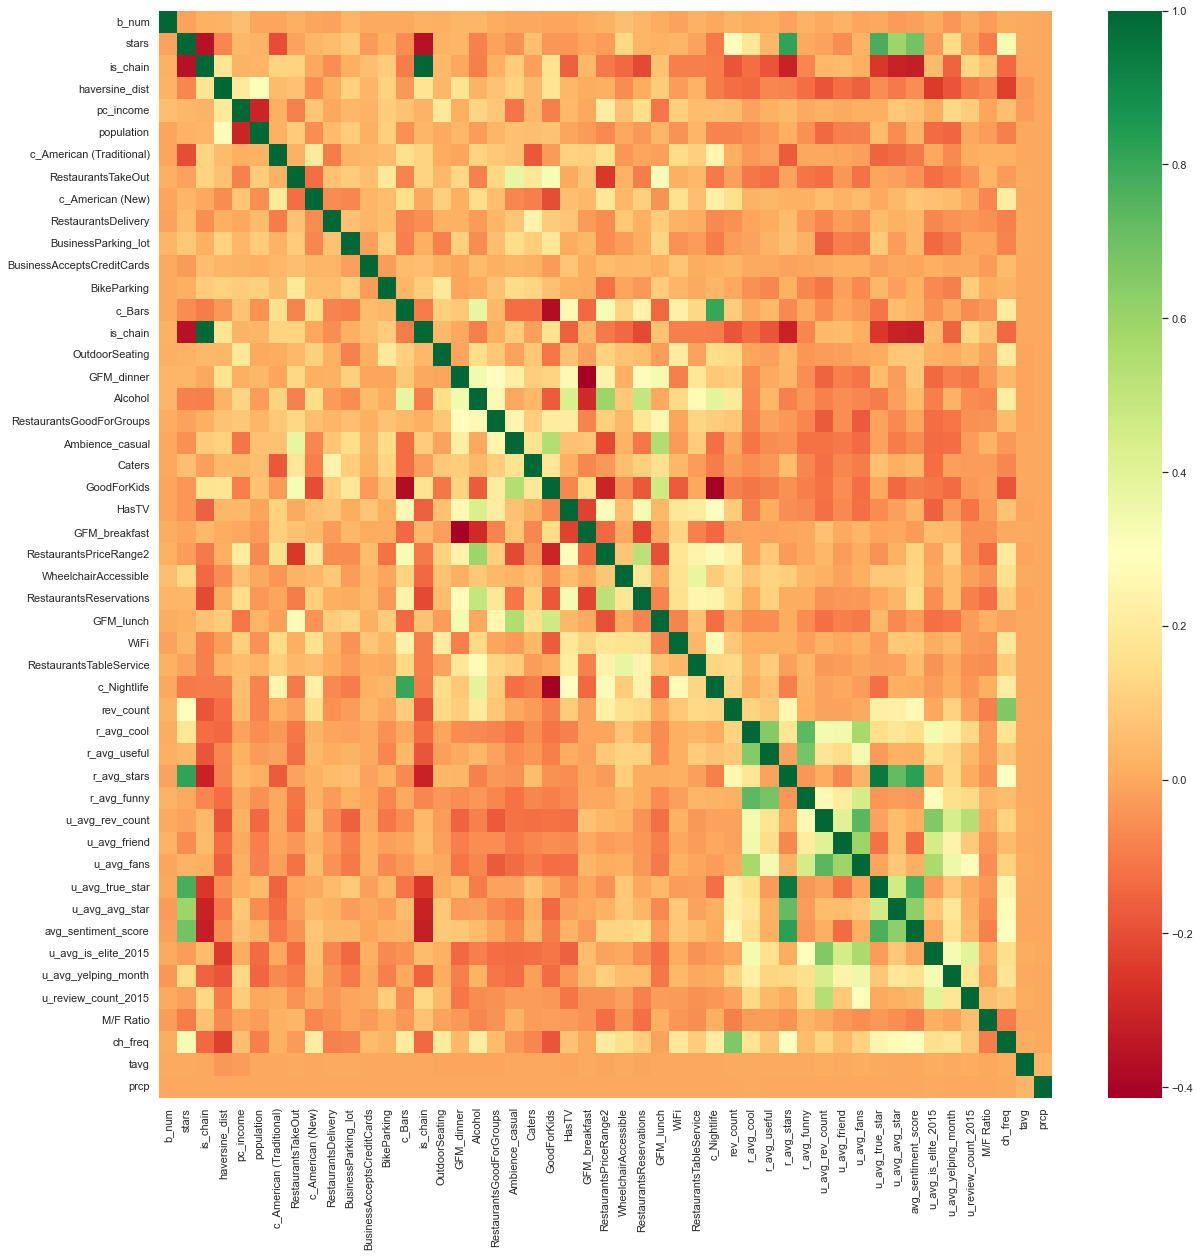

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='RdYlGn')

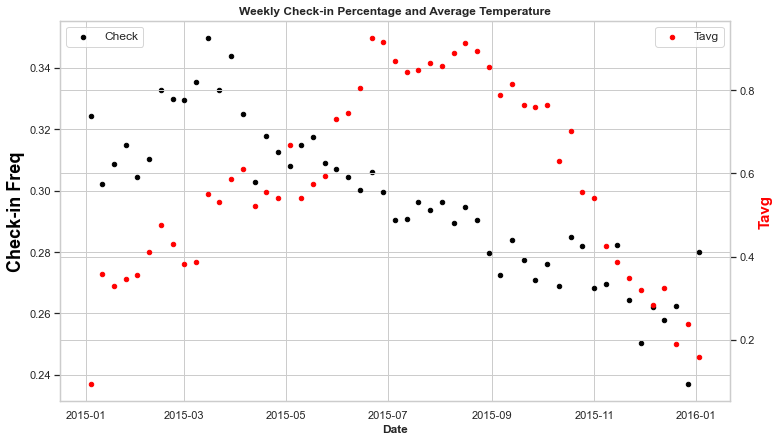

In [90]:
data.date = pd.to_datetime(data.date)
#ax0 = data.iloc[:,[0,-1,-5]].groupby(data.date).mean().reset_index().plot(kind='scatter',y=['check'],x=['date'])
ax0 = data.set_index('date').iloc[:,[-1,-5]].groupby(pd.Grouper(freq='W')).mean().reset_index().plot(
    kind='scatter',y='check',x='date',color='black',figsize=(12,7))
ax0.set_ylabel('Check-in Freq',color='black',fontsize=18,fontweight='bold')
ax0.set_xlabel('Date',fontsize=12,fontweight='bold')
ax0.set_title('Weekly Check-in Percentage and Average Temperature',fontsize=12,fontweight='bold')
ax0.legend(['Check'],loc='upper left',fontsize=12,frameon=True)

ax1 = ax0.twinx()
ax1 = data.set_index('date').iloc[:,[0,-1,-5]].groupby(pd.Grouper(freq='W')).mean().reset_index().plot(
    kind='scatter',y='tavg',x='date',ax=ax1,color='red')
ax1.set_ylabel('Tavg',color='red',fontsize=15,fontweight='bold')
ax1.legend(['Tavg'],loc='upper right',fontsize=12,frameon=True)

#plt.savefig('Weekly_Checkin&Temp.png',dpi=300,bbox_inches='tight')

### Scaling

In [ ]:
# Do Min Max Scaling for Necessary Columns in data
data.drop('business_id',axis=1,inplace=True)
data.drop('ch_freq',axis=1,inplace=True)

In [ ]:
#Min Max Scaling
scaled_columns = ['stars', 'RestaurantsPriceRange2','haversine_dist',
'pc_income', 'population', 'rev_count','r_avg_cool','r_avg_useful','r_avg_stars',
'r_avg_funny','u_avg_rev_count','u_avg_friend','u_avg_fans','u_avg_true_star','u_avg_avg_star','u_avg_yelping_month',
'u_review_count_2015','M/F Ratio','tavg','prcp']

#Min Max Scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in scaled_columns:
    data.loc[:,i] = scaler.fit_transform(data.loc[:,i].values.reshape(-1,1))

# D - ML <a name='p4'></a>

### Read File & Libraries

In [89]:
data = pd.read_csv('data_to_predict.csv')
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score    
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
from sklearn.ensemble import RandomForestRegressor, StackingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV


### Correlation HeatMap for All Data

In [91]:
corr= data.corr()
corr = round(corr,3)

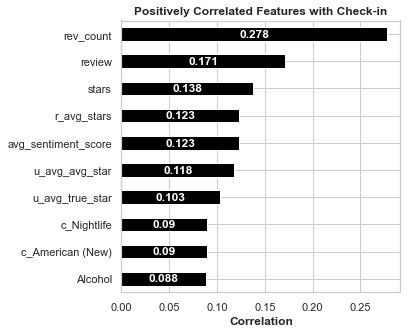

In [92]:
ax_corr = corr['check'].sort_values(ascending=True)[39:49].plot(kind='barh',figsize=(5,5),color='black')
ax_corr.set_xlabel('Correlation',fontsize=12,fontweight='bold')
ax_corr.set_title('Positively Correlated Features with Check-in',fontsize=12,fontweight='bold')
for container in ax_corr.containers:
    ax_corr.bar_label(container, fontsize=12, fontweight='bold', color='white', label_type='center')
plt.savefig('Positive_Correlation_Checkin.png',dpi=300,bbox_inches='tight')

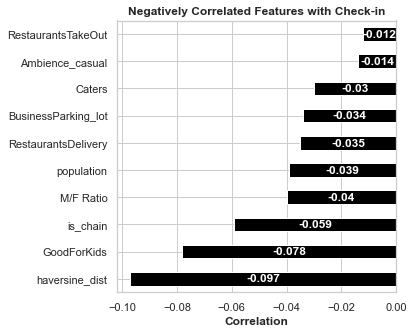

In [93]:
ax_corr2 = corr['check'].sort_values(ascending=True)[:10].plot(kind='barh',figsize=(5,5),color='black')
ax_corr2.set_xlabel('Correlation',fontsize=12,fontweight='bold')
ax_corr2.set_title('Negatively Correlated Features with Check-in',fontsize=12,fontweight='bold')
for container in ax_corr2.containers:
    ax_corr2.bar_label(container, fontsize=12, fontweight='bold', color='white',label_type='center')
plt.savefig('Negative_Correlation_Checkin.png',dpi=300,bbox_inches='tight')

### Split Data

In [94]:
data_backup = data.copy()
len(data_backup)

627435

In [95]:
#Split Train Test Dataset

X = data.drop('check',axis=1)
X = X.iloc[:,2:]
y = data['check']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Results DF

In [ ]:
#results_df = pd.DataFrame(columns=['Model','param','Accuracy','R2','MSE','ROC','Time','all_results','Predict_Proba','type'])

actual = ['Actual',"","","","","","",
np.array(y_test.reset_index()['check']),
"",""]
results_df.loc[len(results_df),:] = actual

## Ml Models

### 1.KNN

In [ ]:
#Do K-nearest Neighbors for Check Column in data
knn_results = []
for i in [10,20,50,100]:
#Perform Knn
    knn = KNeighborsClassifier(n_neighbors=i)
    start_time = time.time()
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    proba = knn.predict_proba(X_test)
    end_time = time.time()

    # Evaluate the model
    #print('-------',i,'-------')
    #print('KNN Accuracy: ', accuracy_score(y_test, y_pred))
    #print('KNN ROC AUC: ', roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results_df.loc[len(results_df),:] = [f'KNN_{20}',
    i,
    round(accuracy_score(y_test, y_pred),4),
    round(r2_score(y_test, y_pred),4),
    round(mean_squared_error(y_test, y_pred),4),
    round(roc_auc_score(y_test, y_pred),4),
    round(end_time-start_time,4),
    y_pred,
    proba[:,1],
    'KNN']

#### 2.Linear Regression

In [ ]:
#Perform Linear Regression on dataframe data
lr_results = []
#Perform Linear Regression on dataframe data, column check
lr = LinearRegression()
start_time = time.time()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
end_time = time.time()
results_df.loc[len(results_df),:] = ['Linear Regression',
"",
round(r2_score(y_test, y_pred),4),
round(mean_squared_error(y_test, y_pred),4),
round(roc_auc_score(y_test, y_pred),4),
round(end_time-start_time,4),
y_pred,
'LR']
#Show the Results of Linear Regression
print('Linear Regression Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Linear Regression R2 Score: ', r2_score(y_test, y_pred))

### 3.Naive Bayes

In [ ]:
#Perform Naive Bayes on dataframe data, column check
#var_smoothing, default 1e-09 try until 5
nb = GaussianNB(var_smoothing=1)
start_time = time.time()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
proba = np.around(nb.predict_proba(X_test)[:,1],4)
end_time = time.time()

#Show the Results of Naive Bayes

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
results_df.loc[len(results_df),:] = ['Naive Bayes',
1,
round(metrics.accuracy_score(y_test, y_pred),4),
round(r2_score(y_test, y_pred),4),
round(mean_squared_error(y_test, y_pred),4),
round(roc_auc_score(y_test, y_pred),4),
round(end_time-start_time,4),
y_pred,
proba,
'NB']

#### 4.SVM

In [ ]:
#Perform SVM on dataframe data, column check

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
#Show the Results of SVM
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
results_df.loc[len(results_df),:] = ['SVM',
round(metrics.accuracy_score(y_test, y_pred),4),
round(r2_score(y_test, y_pred),4),
round(mean_squared_error(y_test, y_pred),4),
round(roc_auc_score(y_test, y_pred),4),
round(end_time-start_time,4),
y_pred,
'SVM']


### 5.Neural Network

In [ ]:
#Perform ANN on dataframe data, column check
for solv in ['adam','lbfgs']:
    for layer in [100,200,500]:        
        ann = MLPClassifier(solver=solv, alpha=1e-5, hidden_layer_sizes=(layer, 1), random_state=1)
        start_time = time.time()
        ann.fit(X_train, y_train)
        y_pred = ann.predict(X_test)
        proba = np.around(ann.predict_proba(X_test)[:,1],4)
        end_time = time.time()
        #Show the Results of ANN
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        #print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
        #print("Classification Report:",classification_report(y_test, y_pred))
        print("ROC AUC:",roc_auc_score(y_test, y_pred))
        results_df.loc[len(results_df),:] = ['ANN',
        str(solv)+'_'+str(layer),
        round(metrics.accuracy_score(y_test, y_pred),4),
        round(r2_score(y_test, y_pred),4),
        round(mean_squared_error(y_test, y_pred),4),
        round(roc_auc_score(y_test, y_pred),4),
        round(end_time-start_time,4),
        y_pred,
        proba,
        'ANN']

### 6.Random Forest

In [ ]:
#Perform Random Forest on dataframe data, column check
#n_estimator 100,200,500, max_depth 0,20
for est in [100,200,500]:
    for depth in [5,20]:
            rf = RandomForestClassifier(n_estimators=est, random_state=42,max_depth=depth)
            start_time = time.time()
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            proba = np.around(rf.predict_proba(X_test)[:,1],4)
            end_time = time.time()
            #Evaluate the Results of Random Forest Classifier
            print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

            
            """
            results_df.loc[len(results_df),:] = ['RF',
            str(est)+'_'+str(depth),
            round(metrics.accuracy_score(y_test, y_pred),4),
            round(r2_score(y_test, y_pred),4),
            round(mean_squared_error(y_test, y_pred),4),
            round(roc_auc_score(y_test, y_pred),4),
            round(end_time-start_time,4),
            y_pred,
            proba,
            'RF']"""

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=5)
start_time = time.time()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
proba = np.around(rf.predict_proba(X_test)[:,1],4)
end_time = time.time()
#Evaluate the Results of Random Forest Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
rf_features = round(pd.DataFrame(X_train.columns,rf.feature_importances_).reset_index().rename(columns={'index':'importance',
            0:'feature'}).sort_values('importance',ascending=False)[:10],3).sort_values('importance',
            ascending=True)

In [ ]:
ax0 = rf_features.plot(kind='barh',x='feature',y='importance',color='black',figsize=(5,5))
for container in ax0.containers:
    ax0.bar_label(container, label_type='center',fontsize=10, color='white', fontweight='bold')
ax0.set_title('Random Forest Feature Importance')
plt.savefig('RF_Feature_Importance_black.png',dpi=300,bbox_inches='tight')

### 7.XG Boost

In [ ]:
#Perform XG Boost on dataframe data, column check

#max_depth, def6, try 3,10, eta def 0.3 try 0.1 0.3 0.5
for depth in [3,6,10]:
    for etax in [0.1,0.3,0.5]:
        xgb = XGBClassifier(eta=etax,max_depth=depth)
        start_time = time.time()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        proba = np.around(xgb.predict_proba(X_test)[:,1],4)
        end_time = time.time()
        #Evaluate the Results of XG Boost Classifier
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print("ROC AUC:",metrics.roc_auc_score(y_test, y_pred))
        """
        ax_gb = pd.DataFrame(X_train.columns,xgb.feature_importances_).reset_index().rename(columns={'index':'importance',
        0:'feature'}).sort_values('importance',ascending=False)[:20].sort_values('importance',
        ascending=True).plot(kind='barh',x='feature',y='importance')
        ax_gb.title.set_text('XG Boost Feature Importance')
        plt.show()
        """
        results_df.loc[len(results_df),:] = ['XG Boost',
        str(depth)+'_'+str(etax),
        round(metrics.accuracy_score(y_test, y_pred),4),
        round(r2_score(y_test, y_pred),4),
        round(mean_squared_error(y_test, y_pred),4),
        round(metrics.roc_auc_score(y_test, y_pred),4),
        round(end_time-start_time,4),
        y_pred,
        proba,
        'XGB']

In [ ]:
xgb = XGBClassifier(eta=0.3,max_depth=6)
start_time = time.time()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
proba = np.around(xgb.predict_proba(X_test)[:,1],4)
end_time = time.time()
#Evaluate the Results of XG Boost Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC:",metrics.roc_auc_score(y_test, y_pred))

In [ ]:
ax_gb = round(pd.DataFrame(X_train.columns,xgb.feature_importances_).reset_index().rename(columns={'index':'importance',
0:'feature'}).sort_values('importance',ascending=False)[:10],3).sort_values('importance',
ascending=True).plot(kind='barh',x='feature',y='importance',figsize=(5,5),color='black')
for container in ax_gb.containers:
    ax_gb.bar_label(container, label_type='center',fontsize=10, color='white', fontweight='bold')
ax_gb.title.set_text('XG Boost Feature Importance')
#Change background color to white
ax_gb.set_facecolor('white')
plt.savefig('XG Boost Feature Importance_black.png',dpi=300,bbox_inches='tight')

#### Feature Imp. Plot for RF & XG Boost

In [ ]:
ax_gb = round(pd.DataFrame(X_train.columns,xgb.feature_importances_).reset_index().rename(columns={'index':'importance',
0:'feature'}).sort_values('importance',ascending=False)[:10],3).sort_values('importance',
ascending=True).plot(kind='barh',x='feature',y='importance',color='lightcoral')
for container in ax_gb.containers:
    ax_gb.bar_label(container, label_type='center',fontsize=10, color='black', fontweight='bold')
ax_gb.set_title('XG Boost Feature Importance',fontsize=12,fontweight='bold')
plt.savefig('XG Boost Feature Importance.png',dpi=300,bbox_inches='tight')

#Increase the white space between the subplots
ax0 = rf_features.plot(kind='barh',x='feature',y='importance',color='#145369')
for container in ax0.containers:
    ax0.bar_label(container, label_type='center',fontsize=10, color='white', fontweight='bold')
ax0.set_title('Random Forest Feature Importance',fontsize=12,fontweight='bold')
plt.savefig('Random Forest Feature Importance.png',dpi=300,bbox_inches='tight')
plt.show()

### 7.1 XGBRF

In [ ]:
#Perform XGBoost Random Forest Classifier on dataframe data, column check
#nestimators, 20,50,100, max depth def 6 try 3,6,10

for est in [20,50,100]:
    for depth in [3,6,10]:
        start_time = time.time()
        xgbrf = XGBRFClassifier(n_estimators=est, max_depth=depth)
        xgbrf.fit(X_train, y_train)
        y_pred = xgbrf.predict(X_test)
        proba = np.around(xgbrf.predict_proba(X_test)[:,1],4)
        end_time = time.time()
        #Evaluate the Results of XG Boost Random Forest Classifier
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print("ROC AUC:",metrics.roc_auc_score(y_test, y_pred))
        pd.DataFrame(X_train.columns,xgbrf.feature_importances_).reset_index().rename(columns={'index':'importance',
        0:'feature'}).sort_values('importance',ascending=False)[:20].sort_values('importance',
        ascending=True).plot(kind='barh',x='feature',y='importance')
        plt.show()
        results_df.loc[len(results_df),:] = ['XGBRF',
        str(est)+'_'+str(depth),
        round(metrics.accuracy_score(y_test, y_pred),4),
        round(r2_score(y_test, y_pred),4),
        round(mean_squared_error(y_test, y_pred),4),
        round(metrics.roc_auc_score(y_test, y_pred),4),
        round(end_time-start_time,4),
        y_pred,
        proba,
        'XGBRF']

### 8.Decision Tree

In [ ]:
#Perform Tree on dataframe data, column check
#criterion def gini, try entropy, log_loss
for crit in ['gini','entropy']:
    tree = DecisionTreeClassifier(criterion=crit)
    start_time = time.time()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    proba = np.around(tree.predict_proba(X_test)[:,1],4)
    end_time = time.time()
    #Evaluate the Results of Decision Tree Classifier
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("ROC AUC:",metrics.roc_auc_score(y_test, y_pred))
    pd.DataFrame(X_train.columns,tree.feature_importances_).reset_index().rename(columns={'index':'importance',
    0:'feature'}).sort_values('importance',ascending=False)[:20].sort_values('importance',
    ascending=True).plot(kind='barh',x='feature',y='importance')
    plt.show()
    results_df.loc[len(results_df),:] = ['Decision Tree',
    str(crit),
    round(metrics.accuracy_score(y_test, y_pred),4),
    round(r2_score(y_test, y_pred),4),
    round(mean_squared_error(y_test, y_pred),4),
    round(metrics.roc_auc_score(y_test, y_pred),4),
    round(end_time-start_time,4),
    y_pred,
    proba,
    'DecisionT']

### 9.Logistic Regression

In [ ]:

#penalty default l2, try l1, elasticnet, max_iter def 100 try 100,250,500
for solv in ['newton-cg', 'lbfgs','saga']:
    for iter in [100,250,500]:
        start_time = time.time()
        logreg = LogisticRegression(solver=solv,max_iter=iter,)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        proba = np.around(logreg.predict_proba(X_test)[:,1],4)
        end_time = time.time()
        #Evaluate the Results of Logistic Regression
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print("ROC AUC:",metrics.roc_auc_score(y_test, y_pred))
        """
        pd.DataFrame(X_train.columns,logreg.coef_).reset_index().rename(columns={'index':'importance',
        0:'feature'}).sort_values('importance',ascending=False)[:20].sort_values('importance',
        ascending=True).plot(kind='barh',x='feature',y='importance')
        plt.show()
        """
        results_df.loc[len(results_df),:] = ['Logistic Regression',
        str(solv)+'_'+str(iter),
        round(metrics.accuracy_score(y_test, y_pred),4),
        round(r2_score(y_test, y_pred),4),
        round(mean_squared_error(y_test, y_pred),4),
        round(metrics.roc_auc_score(y_test, y_pred),4),
        round(end_time-start_time,4),
        y_pred,
        proba,
        'LogReg']

### 10.Stacked

In [ ]:
base_models = [
    ('ANN',MLPClassifier()),
    ('XGB', XGBClassifier()),
    ('RF', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGBRF', XGBRFClassifier()),
    ('NB',GaussianNB()),
    ('LogReg',LogisticRegression()),
    ]
stacked = StackingClassifier(
    estimators = base_models,
    final_estimator = XGBClassifier(),
    cv = 5)
    
start_time = time.time()
stacked.fit(X_train, y_train)    
stacked_prediction = stacked.predict(X_test)
#proba = np.around(stacked.prediction_proba(X_test)[:,1],4)
end_time = time.time()
stacked_r2 = stacked.score(X_test, y_test)
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("Accuracy:",metrics.accuracy_score(y_test, stacked_prediction))
print("ROC AUC:",metrics.roc_auc_score(y_test, stacked_prediction))
print("----------------------------------")

results_df.loc[len(results_df),:] = ['Stacked',
"",
round(metrics.accuracy_score(y_test, stacked_prediction),4),
round(r2_score(y_test, stacked_prediction),4),
round(mean_squared_error(y_test, stacked_prediction),4),
round(metrics.roc_auc_score(y_test, stacked_prediction),4),
round(end_time-start_time,4),
y_pred,
"",
'Stacked']

### Parameter DF

In [ ]:
#Create a Dataframe for Parameters
param_df = pd.DataFrame(columns=['Model','1st Parameter','2nd Parameter'])
#Add all models to Model Column
param_df['Model'] = results_df_best['Model']
param_df.reset_index(drop=True, inplace=True)
param_df.iloc[0,1] = 'Var Smoothing: Default = 1e-09,\n Tested = [1e-09:1]'
print(param_df.to_latex(index=False))

## Results DF

In [96]:
results_df = pd.read_pickle('results_df_2.pkl')

In [97]:
results_df_best = results_df.iloc[[0,5,9,17,30,32,36,44,46],:]
for i in list([2,3,4,5,6,10,11]):
    results_df_best.iloc[:,i] = pd.to_numeric(results_df_best.iloc[:,i],errors='coerce')
results_df_best.iloc[8,1] = 'Default'
results_df_best = round(results_df_best,2)

In [98]:
results_df_best.replace('KNN_20','KNN_50',inplace=True)
results_df_best

,Model,param,Accuracy,R2,MSE,AUC,Time,all_results,Predict_Proba,type,Gini Coef.,TDL
0,Naive Bayes,1,0.71,-0.39,0.29,0.54,0.13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3598, 0.2451, 0.242, 0.1736, 0.4524, 0.3278...",NB,0.25,0.97
5,ANN,lbfgs_200,0.75,-0.22,0.25,0.63,7396.03,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.1254, 0.148, 0.1843, 0.1646, 0.206, 0.7113,...",ANN,0.34,1.34
9,RF,200_5,0.73,-0.31,0.27,0.56,8.77,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2665, 0.1986, 0.319, 0.2073, 0.2404, 0.5313...",RF,0.19,0.83
17,XG Boost,6_0.3,0.75,-0.20,0.25,0.63,7.34,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.2625, 0.1573, 0.16, 0.1288, 0.1815, 0.6168,...",XGB,0.36,1.33
30,XGBRF,100_10,0.75,-0.21,0.25,0.63,14.57,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2366, 0.2092, 0.2788, 0.1955, 0.2, 0.7244, ...",XGBRF,0.25,1.34
32,Decision Tree,entropy,0.66,-0.63,0.34,0.59,1.29,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...",DecisionT,0.70,NaN
36,Logistic Regression,lbfgs_100,0.73,-0.30,0.27,0.58,1.17,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.2158, 0.1812, 0.2873, 0.1734, 0.2602, 0.583...",LogReg,0.26,1.30
44,KNN_50,50,0.75,NaN,NaN,0.62,18.23,"[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.54, 0.28, 0.64, 0.68, 0.28, 0.04, 0.76, 0.1...",KNN,0.37,1.34
46,Stacked,Default,0.74,-0.22,0.26,0.62,550.05,"[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...",,Stacked,NaN,NaN


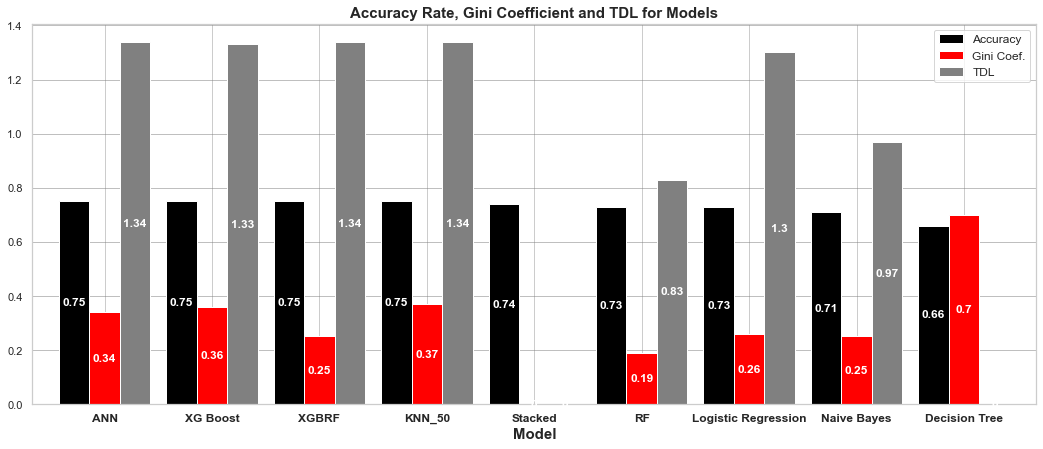

In [99]:
ax0 = results_df_best.iloc[:,:].sort_values('Accuracy',ascending=False).plot(
    x='Model',y=['Accuracy','Gini Coef.','TDL'],kind='bar',figsize=(18,7),rot=0,sharey=True,
    color=['black','red','grey'],width=0.85)
for container in ax0.containers:
    ax0.bar_label(container, fontsize=12,label_type='center',color='white',fontweight='bold')
ax0.set_title('Accuracy Rate, Gini Coefficient and TDL for Models',fontsize=15,fontweight='bold')
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=12, weight='bold')
#Add Horizontal Grid
ax0.yaxis.grid(True, linestyle='-', which='major', color='grey',alpha=0.5)
ax0.set_xlabel('Model',fontsize=15,weight='bold')
plt.legend(loc='upper right',  ncol=1, fontsize=12)
#plt.savefig('Gini Coef., Acc, TDL for Models_2.png',dpi=300,bbox_inches='tight')

### Latex

In [101]:
print(results_df.iloc[:,:-2].sort_values('Accuracy',ascending=False).to_latex(index=False).replace("\\\n", "\\ \hline\n"))

\begin{tabular}{llllllllll}
\toprule
              Model &         param & Accuracy &      R2 &     MSE &     AUC &      Time &                                        all\_results &                                      Predict\_Proba &      type \\ \hline
\midrule
           XG Boost &         6\_0.3 &   0.7506 & -0.1987 &  0.2494 &  0.6338 &    7.3388 & [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0... & [0.2625, 0.1573, 0.16, 0.1288, 0.1815, 0.6168, ... &       XGB \\ \hline
           XG Boost &         3\_0.5 &   0.7491 & -0.2059 &  0.2509 &  0.6241 &    3.5813 & [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0... & [0.2148, 0.1658, 0.1812, 0.159, 0.1766, 0.6716,... &       XGB \\ \hline
              XGBRF &        100\_10 &   0.7489 & -0.2068 &  0.2511 &  0.6254 &   14.5739 & [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0... & [0.2366, 0.2092, 0.2788, 0.1955, 0.2, 0.7244, 0... &     XGBRF \\ \hline
           XG Boost &         6\_0.1 &   0.7486 & -0.2083 &  0.2514 &  0.6234 &  

### Gini and TDL

In [102]:
results_df = pd.read_pickle('results_df_2.pkl')
results_df_copy = results_df.copy()

#results_df.reset_index(drop=True,inplace=True)
#results_df = results_df.iloc[:-1,:]

#### Gini Func

In [103]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

results_df['Gini Coef.'] = ""
for i in range(0,len(results_df)-1):
    results_df.iloc[i,10] = round(gini(results_df.iloc[i,8]),4)

#### TDL

In [ ]:
results_df_2 = pd.DataFrame(columns=['Model','Proba','DecileGroup'])

results_df_best = results_df.iloc[[0,5,9,17,30,32,36,44,46],:]

#To Create TDL
results_tdl = pd.DataFrame()
for i in range(0,len(results_df)):
    print(i)
    try:
        if results_df.loc[i,'Model'] != 'Decision Tree':
            results_df_2 = pd.DataFrame(columns=['Model','param','Proba','Result','DecileGroup'])
            results_df_2.iloc[:,2] = results_df.iloc[i,8]
            results_df_2.iloc[:,0] = results_df.iloc[i,0]
            results_df_2.iloc[:,1] = results_df.iloc[i,1]
            results_df_2.iloc[:,3] = results_df.iloc[i,7]
            results_df_2.iloc[:,4] = pd.qcut(results_df_2.iloc[:,2],10,labels=False)
            results_tdl = results_tdl.append(results_df_2)
    except:
        print('Error')
        pass

results_tdl_2 = results_tdl.groupby(['Model','param','DecileGroup'])['Result'].mean().unstack().reset_index()

results_tdl_3 = results_tdl_2.iloc[:,[0,1,11]].merge(results_df[['Model','param','Accuracy']],on=['Model','param'],how='inner')

results_tdl_3['TDL'] = results_tdl_3.iloc[:,2] / results_tdl_3.iloc[:,3]
#Merge with the results_df
results_df_2 = results_df.merge(results_tdl_3[['Model','param','TDL']],on=['Model','param'],how='left')
results_df_2

In [105]:
results_df_best.rename(columns={'param':'Parameter'},inplace=True)

In [106]:
print(results_df_best.iloc[:,[0,1,2,3,4,5,10,11]].to_latex(index=False).replace("\\\n", "\\ \hline\n"))

\begin{tabular}{llllllll}
\toprule
              Model & Parameter & Accuracy &      R2 &     MSE &     AUC & Gini Coef. &       TDL \\ \hline
\midrule
        Naive Bayes &         1 &   0.7108 & -0.3897 &  0.2892 &  0.5411 &     0.2471 &  0.970165 \\ \hline
                ANN & lbfgs\_200 &   0.7464 & -0.2187 &  0.2536 &  0.6262 &     0.3404 &  1.339764 \\ \hline
                 RF &     200\_5 &   0.7278 &  -0.308 &  0.2722 &  0.5574 &     0.1932 &  0.829534 \\ \hline
           XG Boost &     6\_0.3 &   0.7506 & -0.1987 &  0.2494 &  0.6338 &      0.358 &  1.332268 \\ \hline
              XGBRF &    100\_10 &   0.7489 & -0.2068 &  0.2511 &  0.6254 &     0.2512 &  1.335292 \\ \hline
      Decision Tree &   entropy &   0.6598 & -0.6346 &  0.3402 &   0.589 &     0.6986 &       NaN \\ \hline
Logistic Regression & lbfgs\_100 &     0.73 & -0.2977 &    0.27 &  0.5771 &     0.2595 &  1.303833 \\ \hline
             KNN\_20 &        50 &   0.7455 &         &         &   0.623 &     0.3672 